In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import os

In [2]:
fundamentals_datapath = os.path.join(os.getcwd(), 'Dataset', 'NYSE_Dataset', 'fundamentals.csv')
fundamentals_df = pd.read_csv(fundamentals_datapath)

In [3]:
fundamentals_df.head(n=1)

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   

   Total Current Assets  Total Current Liabilities  Total Equity  \
0          7.072000e+09               9.011000e+09 -7.987000e+09   

   Total Liabilities  Total Liabilities & Equity  Total Revenue  \
0       2.489100e+10                1.690400e+10   2.485500e+10   

   Treasury Stock  For Year  Earnings Per Share  Estimated Shares Outstanding  
0    -367000000.0    2012.0                -5.6                   335000000.0  

[1 rows x 79 columns]

In [4]:
fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

## Data Cleaning and Wrangling

In [5]:
fundamentals_df.describe()

Unnamed: 0  Accounts Payable  Accounts Receivable  \
count  1781.000000      1.781000e+03         1.781000e+03   
mean    890.000000      4.673418e+09        -6.353484e+07   
std     514.274732      1.406047e+10         7.562794e+08   
min       0.000000      0.000000e+00        -6.452000e+09   
25%     445.000000      5.160000e+08        -1.040000e+08   
50%     890.000000      1.334000e+09        -1.830000e+07   
75%    1335.000000      3.246000e+09         7.816000e+06   
max    1780.000000      2.069390e+11         2.266400e+10   

       Add'l income/expense items  After Tax ROE  Capital Expenditures  \
count                1.781000e+03    1781.000000          1.781000e+03   
mean                 6.908940e+07      43.601348         -1.251925e+09   
std                  6.848143e+08     233.924028          2.979963e+09   
min                 -6.768000e+09       0.000000         -3.798500e+10   
25%                 -2.638000e+06      10.000000         -1.151200e+09   
50%                  2.000000e+06      16.000000         -3.580000e+08   
75%                  3.359200e+07      26.000000         -1.291000e+08   
max                  1.416200e+10    5789.000000          5.000000e+06   

       Capital Surplus   Cash Ratio  Cash and Cash Equivalents  \
count     1.781000e+03  1482.000000               1.781000e+03   
mean      5.351784e+09    74.457490               8.521399e+09   
std       1.133977e+10   102.298374               5.432105e+10   
min      -7.215000e+08     0.000000               2.100000e+04   
25%       4.791000e+08    17.000000               3.088000e+08   
50%       1.997080e+09    41.000000               8.625900e+08   
75%       5.735000e+09    90.000000               2.310000e+09   
max       1.082880e+11  1041.000000               7.281110e+11   

       Changes in Inventories  ...  Total Current Assets  \
count            1.781000e+03  ...          1.781000e+03   
mean            -6.787749e+07  ...          6.726349e+09   
std              3.903369e+08  ...          1.344800e+10   
min             -5.562000e+09  ...          0.000000e+00   
25%             -5.400000e+07  ...          1.044178e+09   
50%              0.000000e+00  ...          2.747200e+09   
75%              0.000000e+00  ...          6.162000e+09   
max              3.755000e+09  ...          1.396600e+11   

       Total Current Liabilities  Total Equity  Total Liabilities  \
count               1.781000e+03  1.781000e+03       1.781000e+03   
mean                4.699919e+09  1.188846e+10       4.380420e+10   
std                 9.538832e+09  2.584429e+10       1.817039e+11   
min                 0.000000e+00 -1.324400e+10       2.577000e+06   
25%                 5.640760e+08  2.201492e+09       3.843300e+09   
50%                 1.701500e+09  4.983000e+09       9.141000e+09   
75%                 4.381000e+09  1.080900e+10       2.389700e+10   
max                 9.028100e+10  2.562050e+11       2.340547e+12   

       Total Liabilities & Equity  Total Revenue  Treasury Stock     For Year  \
count                1.781000e+03   1.781000e+03    1.781000e+03  1608.000000   
mean                 5.569266e+10   2.029154e+10   -3.951522e+09  2013.305348   
std                  2.033612e+11   4.095355e+10    1.407047e+10    19.953135   
min                  2.705000e+06   1.514000e+06   -2.297340e+11  1215.000000   
25%                  6.552689e+09   3.714000e+09   -3.040895e+09  2013.000000   
50%                  1.517000e+10   8.023200e+09   -3.068350e+08  2014.000000   
75%                  3.599710e+10   1.748600e+10    0.000000e+00  2015.000000   
max                  2.572274e+12   4.856510e+11    0.000000e+00  2016.000000   

       Earnings Per Share  Estimated Shares Outstanding  
count         1562.000000                  1.562000e+03  
mean             3.353707                  6.024244e+08  
std              4.695896                  1.142585e+09  
min            -61.200000                 -1.513945e+09  
25%          

In [75]:
# describing key statistics of the dataset
fundamentals_df.describe(include='all').T

count unique  top freq  \
Ticker Symbol                   1781    448  AAL    4   
Period Ending                   1781    NaN  NaN  NaN   
Accounts Payable              1781.0    NaN  NaN  NaN   
Accounts Receivable           1781.0    NaN  NaN  NaN   
Add'l income/expense items    1781.0    NaN  NaN  NaN   
...                              ...    ...  ...  ...   
Treasury Stock                1781.0    NaN  NaN  NaN   
For Year                      1608.0    NaN  NaN  NaN   
Earnings Per Share            1562.0    NaN  NaN  NaN   
Estimated Shares Outstanding  1562.0    NaN  NaN  NaN   
Cluster                       1781.0    NaN  NaN  NaN   

                                                       mean  \
Ticker Symbol                                           NaN   
Period Ending                 2014-10-26 21:41:44.435710208   
Accounts Payable                          4673417755.755194   
Accounts Receivable                         -63534842.22347   
Add'l income/expense items                  69089399.213925   
...                                                     ...   
Treasury Stock                           -3951522290.286356   
For Year                                        2013.305348   
Earnings Per Share                                 3.353707   
Estimated Shares Outstanding                602424367.65398   
Cluster                                             0.49242   

                                              min                  25%  \
Ticker Symbol                                 NaN                  NaN   
Period Ending                 2003-06-30 00:00:00  2013-12-31 00:00:00   
Accounts Payable                              0.0          516000000.0   
Accounts Receivable                 -6452000000.0         -104000000.0   
Add'l income/expense items          -6768000000.0           -2638000.0   
...                                           ...                  ...   
Treasury Stock                    -229734000000.0        -3040895000.0   
For Year                                   1215.0               2013.0   
Earnings Per Share                          -61.2                 1.59   
Estimated Shares Outstanding        -1513945000.0        149331761.189   
Cluster                                       0.0                  0.0   

                                              50%                  75%  \
Ticker Symbol                                 NaN                  NaN   
Period Ending                 2014-12-31 00:00:00  2015-12-31 00:00:00   
Accounts Payable                     1334000000.0         3246000000.0   
Accounts Receivable                   -18300000.0            7816000.0   
Add'l income/expense items              2000000.0           33592000.0   
...                                           ...                  ...   
Treasury Stock                       -306835000.0                  0.0   
For Year                                   2014.0               2015.0   
Earnings Per Share                           2.81                 4.59   
Estimated Shares Outstanding        292940893.611        549216251.585   
Cluster                                       0.0                  0.0   

                                              max                 std  
Ticker Symbol                                 NaN                 NaN  
Period Ending                 2017-01-01 00:00:00                 NaN  
Accounts Payable                   206939000000.0  14060472820.101656  
Accounts Receivable                 22664000000.0    756279433.677091  
Add'l income/expense items          14162000000.0    684814332.321751  
...                                           ...                 ...  
Treasury Stock                                0.0  14070468017.889235  
For Year                                   2016.0           19.953135  
Earnings Per Share                          50.09            4.695896  
Estimated Shares Outstanding   16107692307.700001    1142584658.62381  
Cluster            

In [6]:
fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [7]:
fundamentals_df.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [8]:
# Dropping irrelevant column
fundamentals_df.drop('Unnamed: 0', axis=1, inplace=True)
fundamentals_df.head(n=1)

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0           AAL    2012-12-31      3.068000e+09         -222000000.0   

   Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0               -1.961000e+09           23.0         -1.888000e+09   

   Capital Surplus  Cash Ratio  Cash and Cash Equivalents  ...  \
0     4.695000e+09        53.0               1.330000e+09  ...   

   Total Current Assets  Total Current Liabilities  Total Equity  \
0          7.072000e+09               9.011000e+09 -7.987000e+09   

   Total Liabilities  Total Liabilities & Equity  Total Revenue  \
0       2.489100e+10                1.690400e+10   2.485500e+10   

   Treasury Stock  For Year  Earnings Per Share  Estimated Shares Outstanding  
0    -367000000.0    2012.0                -5.6                   335000000.0  

[1 rows x 78 columns]

In [9]:
fundamentals_df['Period Ending'] = pd.to_datetime(fundamentals_df['Period Ending'])

In [10]:
# Check for duplicates
fundamentals_df.duplicated().sum()

0

In [11]:
# Check for null values
fundamentals_df.isnull().sum()

Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
Add'l income/expense items        0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 78, dtype: int64

## EDA

In [12]:
numerical_cols = fundamentals_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Accounts Payable',
 'Accounts Receivable',
 "Add'l income/expense items",
 'After Tax ROE',
 'Capital Expenditures',
 'Capital Surplus',
 'Cash Ratio',
 'Cash and Cash Equivalents',
 'Changes in Inventories',
 'Common Stocks',
 'Cost of Revenue',
 'Current Ratio',
 'Deferred Asset Charges',
 'Deferred Liability Charges',
 'Depreciation',
 'Earnings Before Interest and Tax',
 'Earnings Before Tax',
 'Effect of Exchange Rate',
 'Equity Earnings/Loss Unconsolidated Subsidiary',
 'Fixed Assets',
 'Goodwill',
 'Gross Margin',
 'Gross Profit',
 'Income Tax',
 'Intangible Assets',
 'Interest Expense',
 'Inventory',
 'Investments',
 'Liabilities',
 'Long-Term Debt',
 'Long-Term Investments',
 'Minority Interest',
 'Misc. Stocks',
 'Net Borrowings',
 'Net Cash Flow',
 'Net Cash Flow-Operating',
 'Net Cash Flows-Financing',
 'Net Cash Flows-Investing',
 'Net Income',
 'Net Income Adjustments',
 'Net Income Applicable to Common Shareholders',
 'Net Income-Cont. Operations',
 'Net Receivables',


In [13]:
import seaborn as sns

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

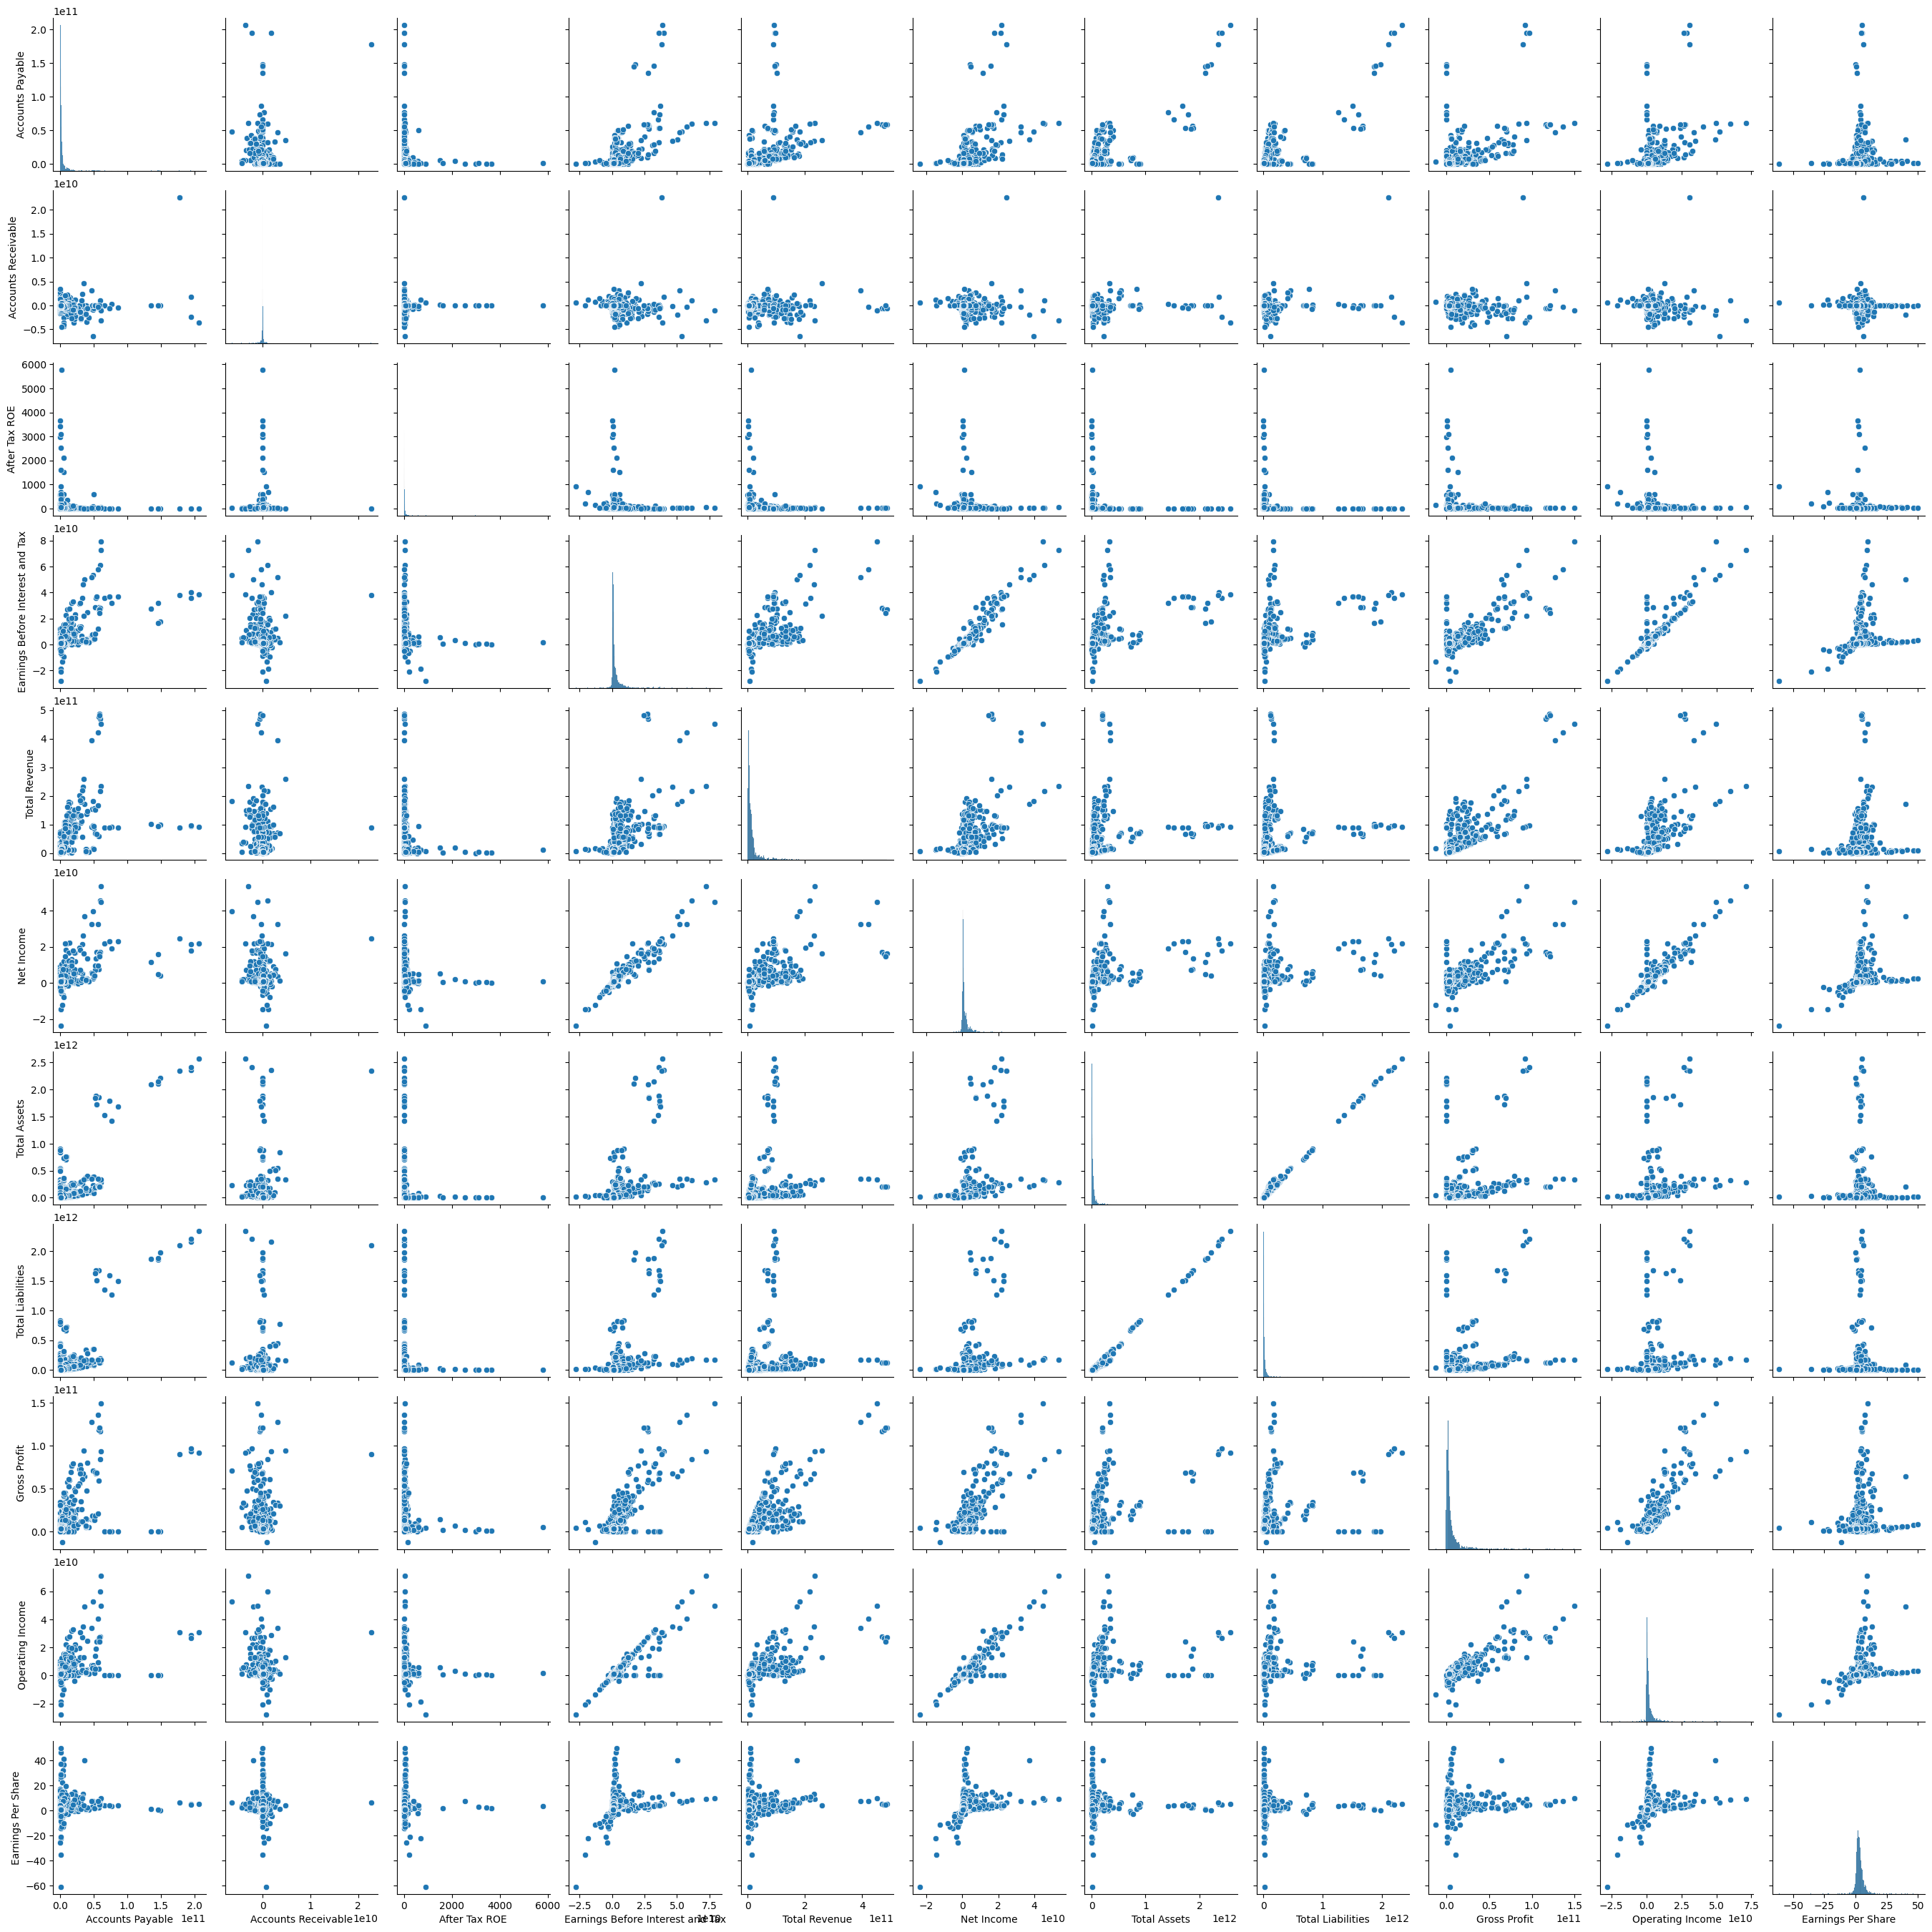

In [14]:
#Selecting a subset of columns for fundamental analysis

columns = ['Ticker Symbol', 'Period Ending', 'Accounts Payable', 'Accounts Receivable', 'After Tax ROE', 'Earnings Before Interest and Tax', 'Total Revenue', 'Net Income', 
           'Total Assets', 'Total Liabilities', 'Gross Profit', 'Operating Income', 'Earnings Per Share']

cleaned_fundamentals_df = fundamentals_df[columns]
numerical_cols = cleaned_fundamentals_df.select_dtypes(include=np.number).columns.tolist()

corr_matrix = cleaned_fundamentals_df[numerical_cols].corr()

sns.pairplot(cleaned_fundamentals_df[numerical_cols])
plt.show()

In [15]:
threshold = 0.7
high_cors_vars = [(col, corr_matrix[col][abs(corr_matrix[col]) > threshold]) for col in corr_matrix]
high_cors_columns = set()
for col, series in high_cors_vars:
    high_cors_columns.update(series.index)

high_cors_columns.discard('Earnings Per Share')
high_cors_columns

{'Accounts Payable',
 'Accounts Receivable',
 'After Tax ROE',
 'Earnings Before Interest and Tax',
 'Gross Profit',
 'Net Income',
 'Operating Income',
 'Total Assets',
 'Total Liabilities',
 'Total Revenue'}

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

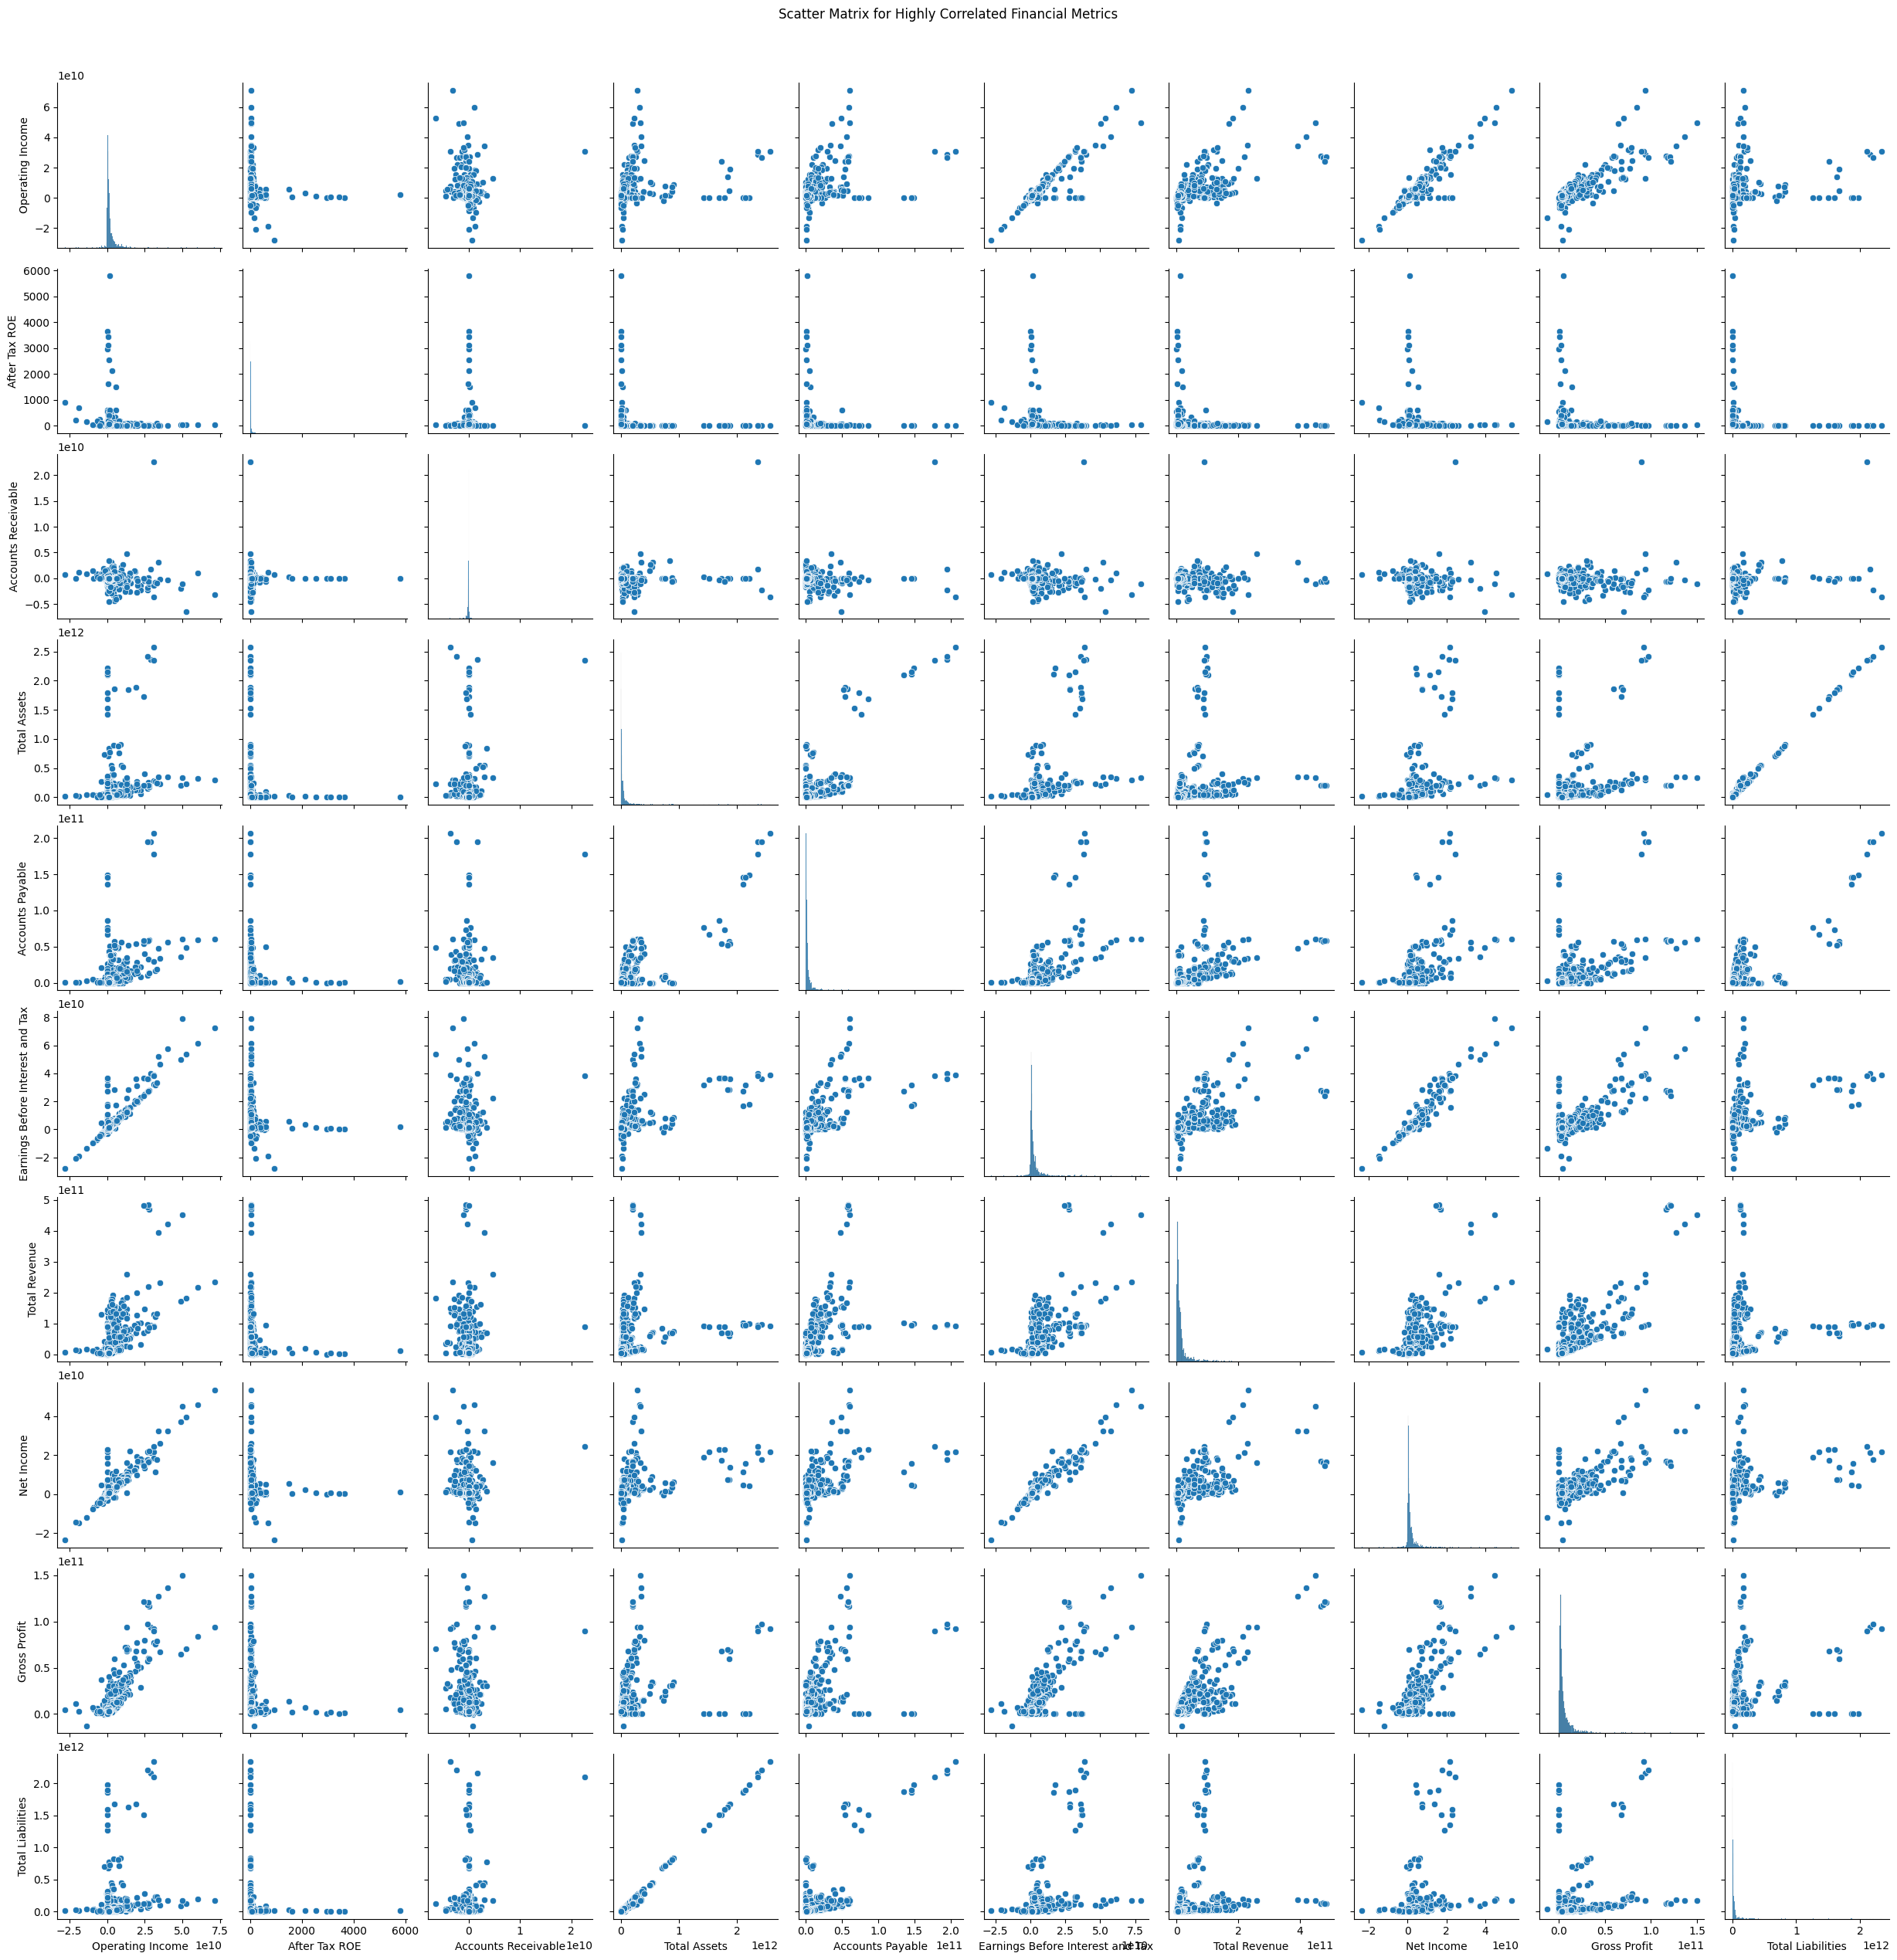

In [16]:
sns.pairplot(cleaned_fundamentals_df[list(high_cors_columns)])
plt.suptitle('Scatter Matrix for Highly Correlated Financial Metrics', y=1.02)
plt.show()

In [78]:
# Describe the statistics for the highly correlated columns

cleaned_fundamentals_df[list(high_cors_columns)].describe().T

count          mean           std  \
Operating Income                  1781.0  2.268980e+09  5.061444e+09   
After Tax ROE                     1781.0  4.360135e+01  2.339240e+02   
Accounts Receivable               1781.0 -6.353484e+07  7.562794e+08   
Total Assets                      1781.0  5.570921e+10  2.033590e+11   
Accounts Payable                  1781.0  4.673418e+09  1.406047e+10   
Earnings Before Interest and Tax  1781.0  2.710102e+09  6.145345e+09   
Total Revenue                     1781.0  2.029154e+10  4.095355e+10   
Net Income                        1781.0  1.705517e+09  3.993401e+09   
Gross Profit                      1781.0  7.189010e+09  1.360778e+10   
Total Liabilities                 1781.0  4.380420e+10  1.817039e+11   

                                           min           25%           50%  \
Operating Income                 -2.791000e+10  5.258610e+08  1.021015e+09   
After Tax ROE                     0.000000e+00  1.000000e+01  1.600000e+01   
Accounts Receivable              -6.452000e+09 -1.040000e+08 -1.830000e+07   
Total Assets                      2.705000e+06  6.552689e+09  1.517000e+10   
Accounts Payable                  0.000000e+00  5.160000e+08  1.334000e+09   
Earnings Before Interest and Tax -2.792700e+10  5.851630e+08  1.139200e+09   
Total Revenue                     1.514000e+06  3.714000e+09  8.023200e+09   
Net Income                       -2.352800e+10  3.528200e+08  6.860880e+08   
Gross Profit                     -1.264700e+10  1.581900e+09  2.991000e+09   
Total Liabilities                 2.577000e+06  3.843300e+09  9.141000e+09   

                                           75%           max  
Operating Income                  2.260000e+09  7.123000e+10  
After Tax ROE                     2.600000e+01  5.789000e+03  
Accounts Receivable               7.816000e+06  2.266400e+10  
Total Assets                      3.599710e+10  2.572274e+12  
Accounts Payable                  3.246000e+09  2.069390e+11  
Earnings Before Interest and Tax  2.586000e+09  7.905300e+10  
Total Revenue                     1.748600e+10  4.856510e+11  
Net Income                        1.697000e+09  5.339400e+10  
Gross Profit                      6.944000e+09  1.494530e+11  
Total Liabilities                 2.389700e+10  2.340547e+12

## Model

### Data Visualization

In [17]:
subset_df = cleaned_fundamentals_df[list(high_cors_columns)]
subset_df = subset_df.dropna()

from sklearn.preprocessing import StandardScaler

sub_scaler = StandardScaler()
scaled_subset_df = sub_scaler.fit_transform(subset_df)
scaled_subset_df = pd.DataFrame(scaled_subset_df, columns=subset_df.columns)

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


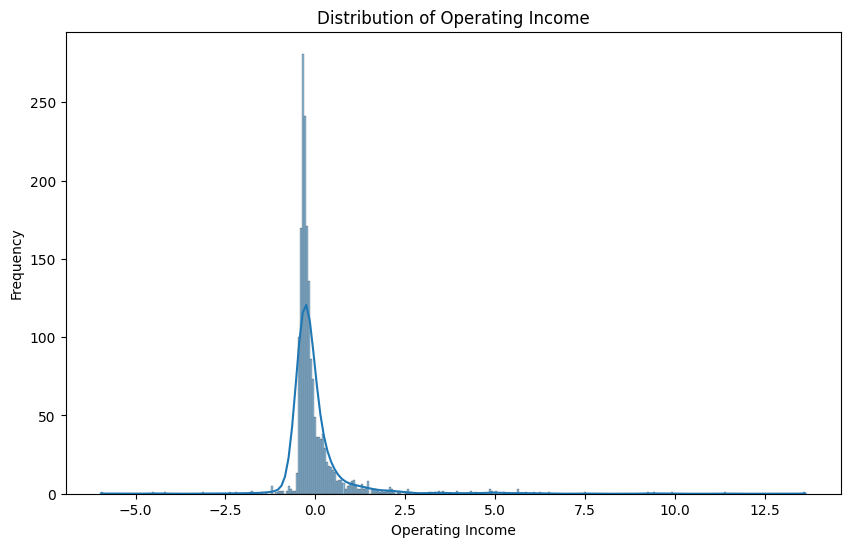

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


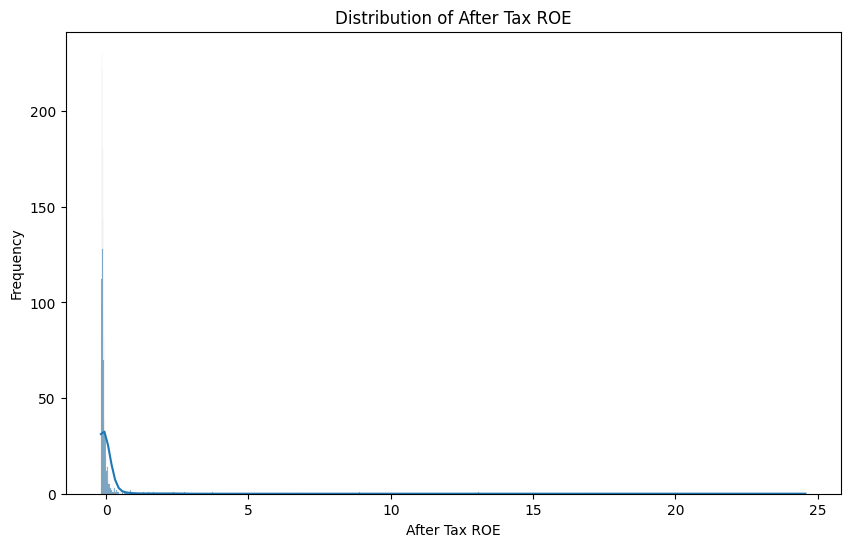

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


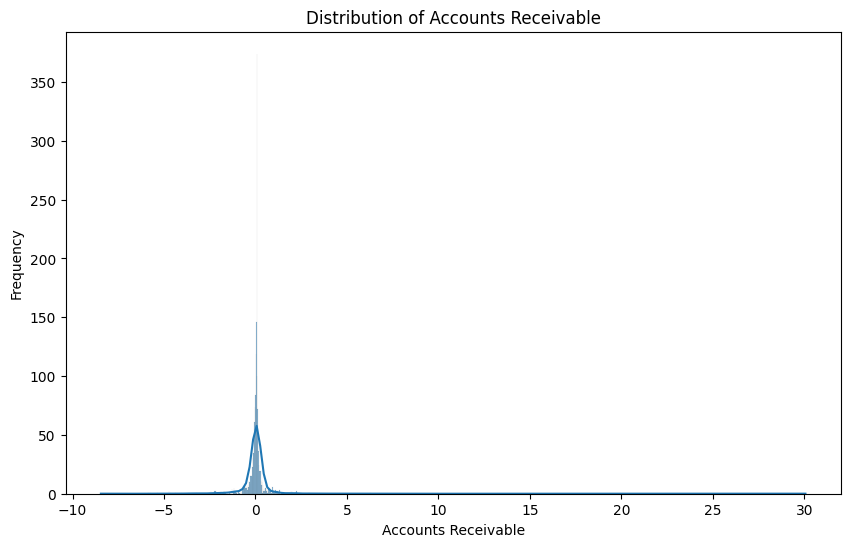

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


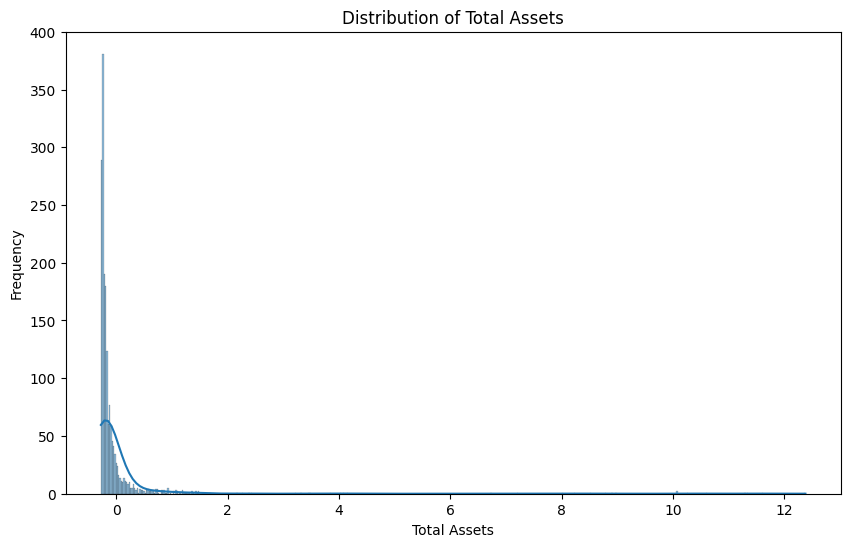

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


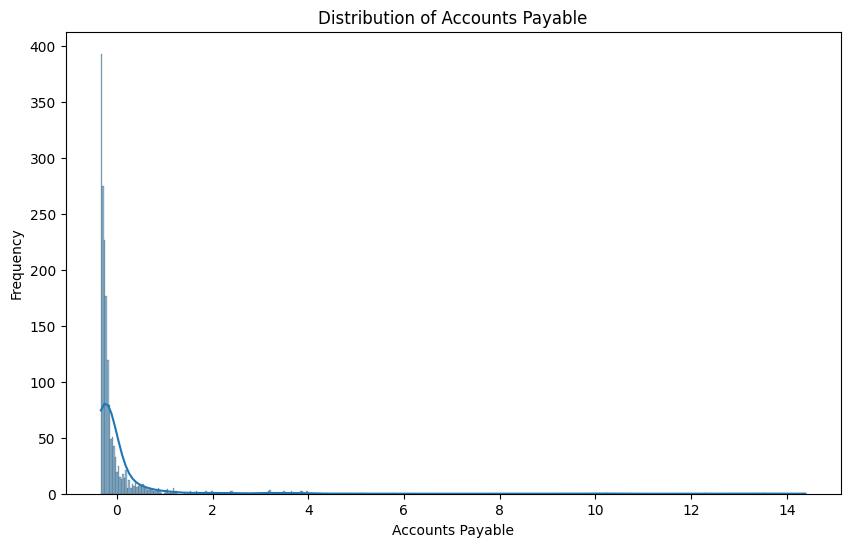

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


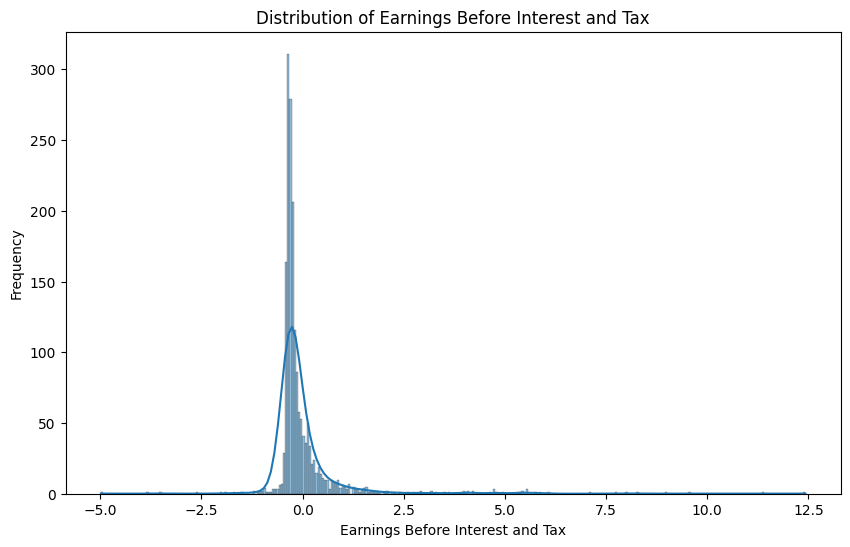

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


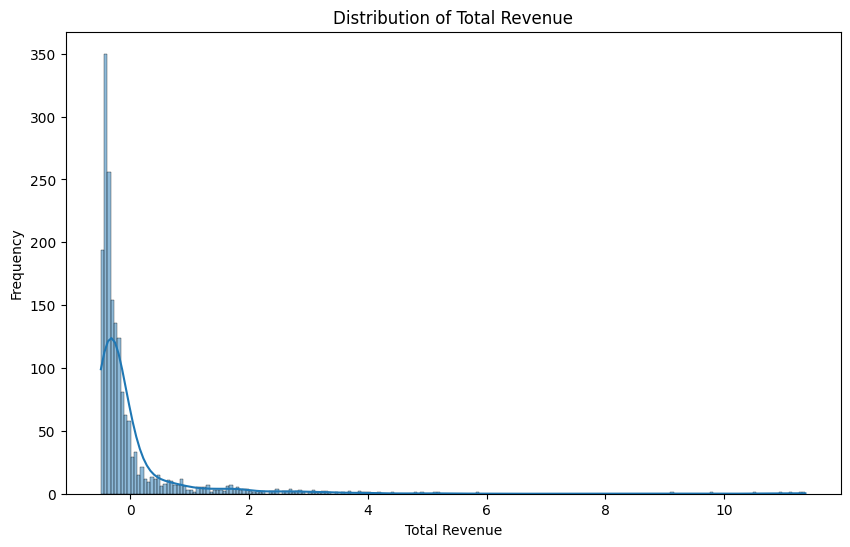

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


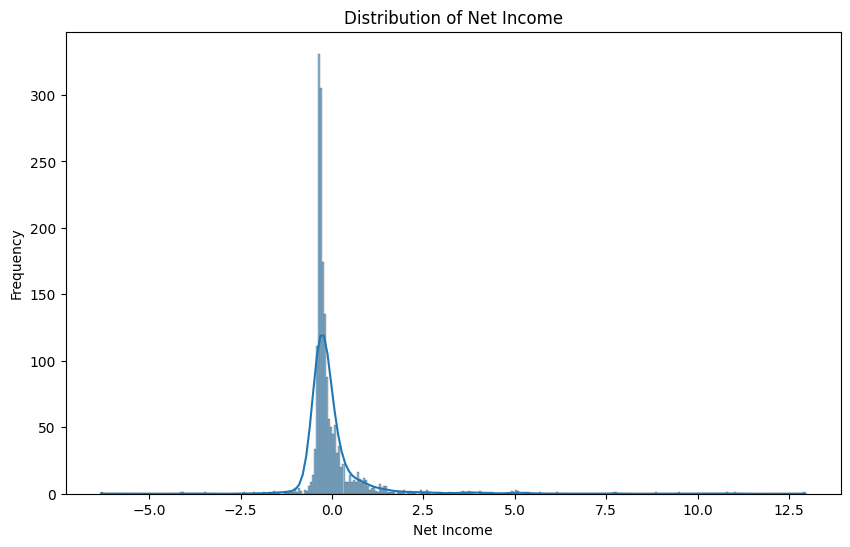

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


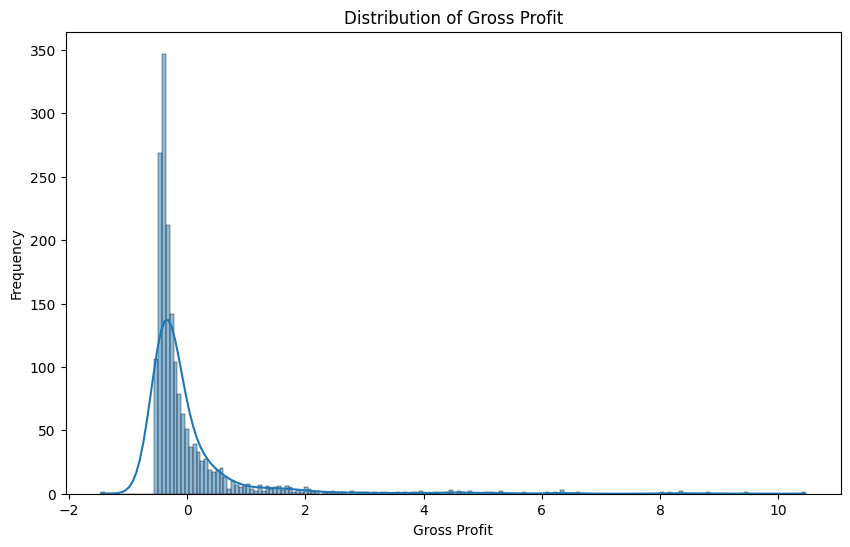

/Users/adityamahamuni/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


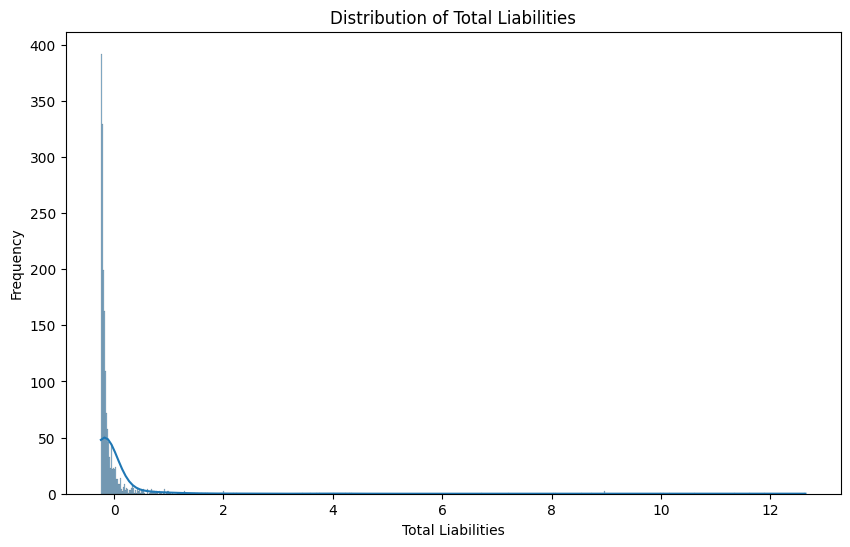

In [18]:
for col in high_cors_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(scaled_subset_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


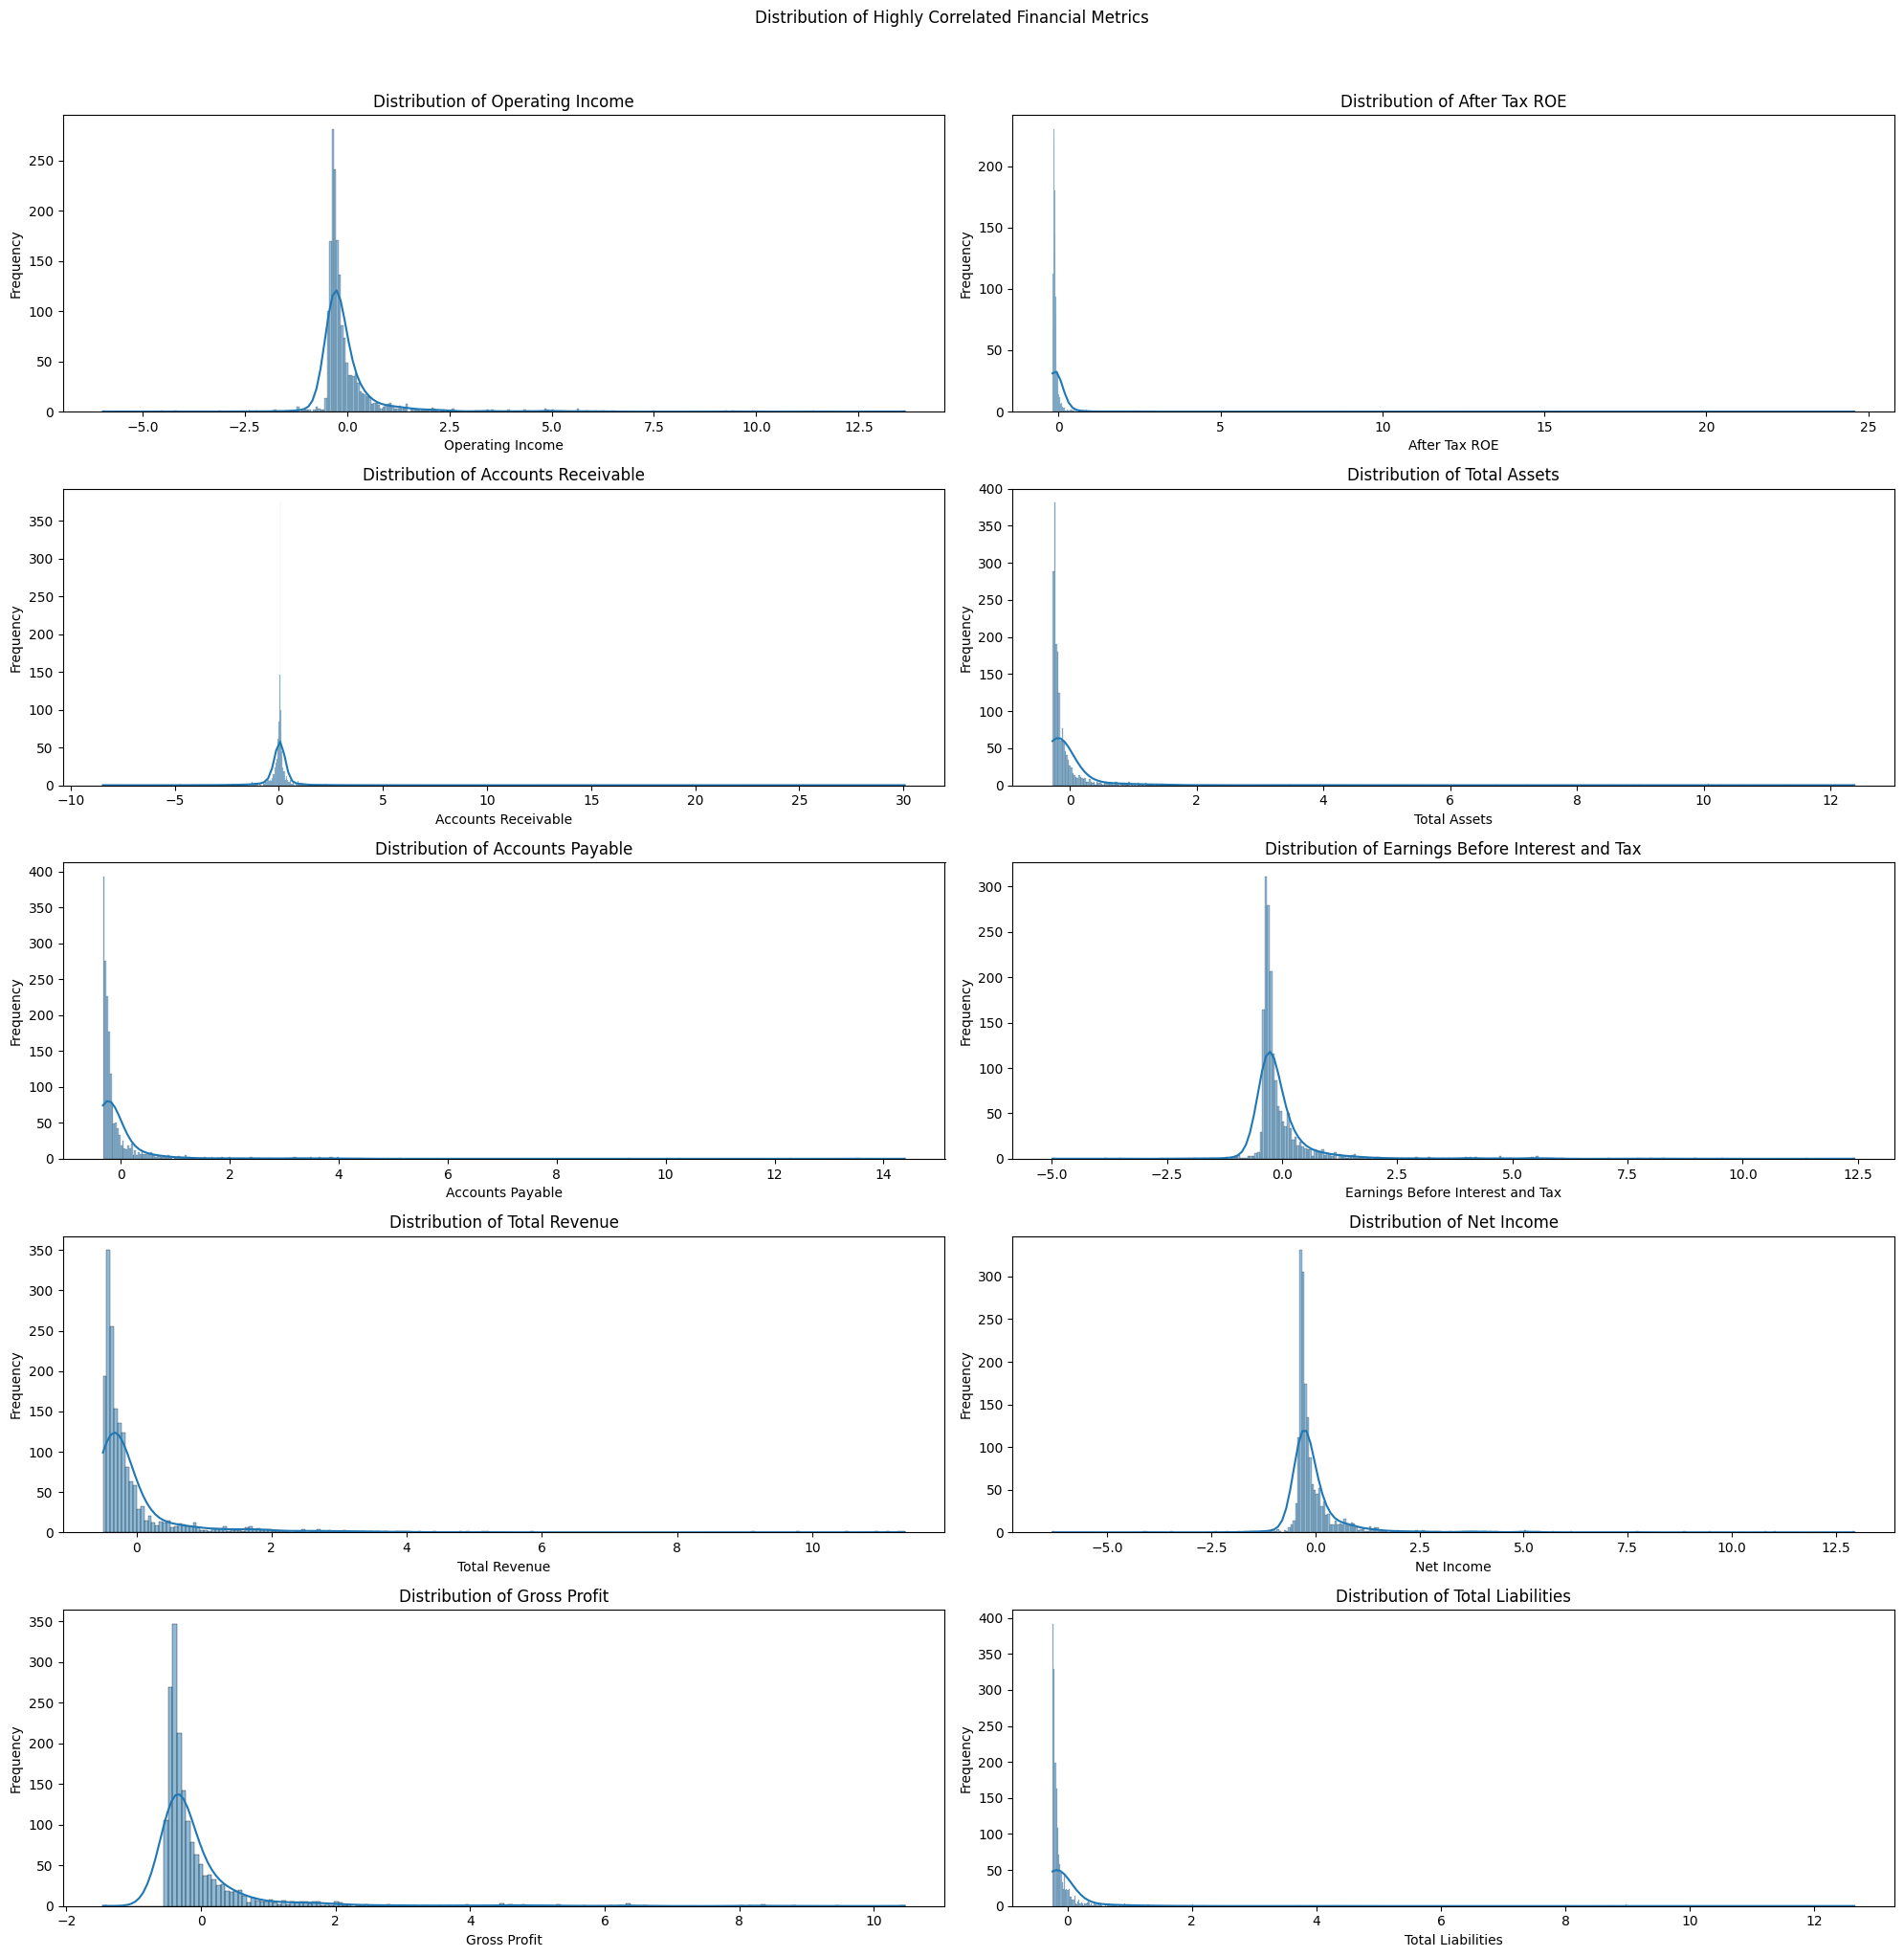

In [67]:
# create a subplot for the 10 highly correlated variables

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Distribution of Highly Correlated Financial Metrics', y=1.02)

for i, col in enumerate(high_cors_columns):
    sns.histplot(scaled_subset_df[col], kde=True, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Distribution of {col}')
    ax[i//2, i%2].set_xlabel(col)
    ax[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


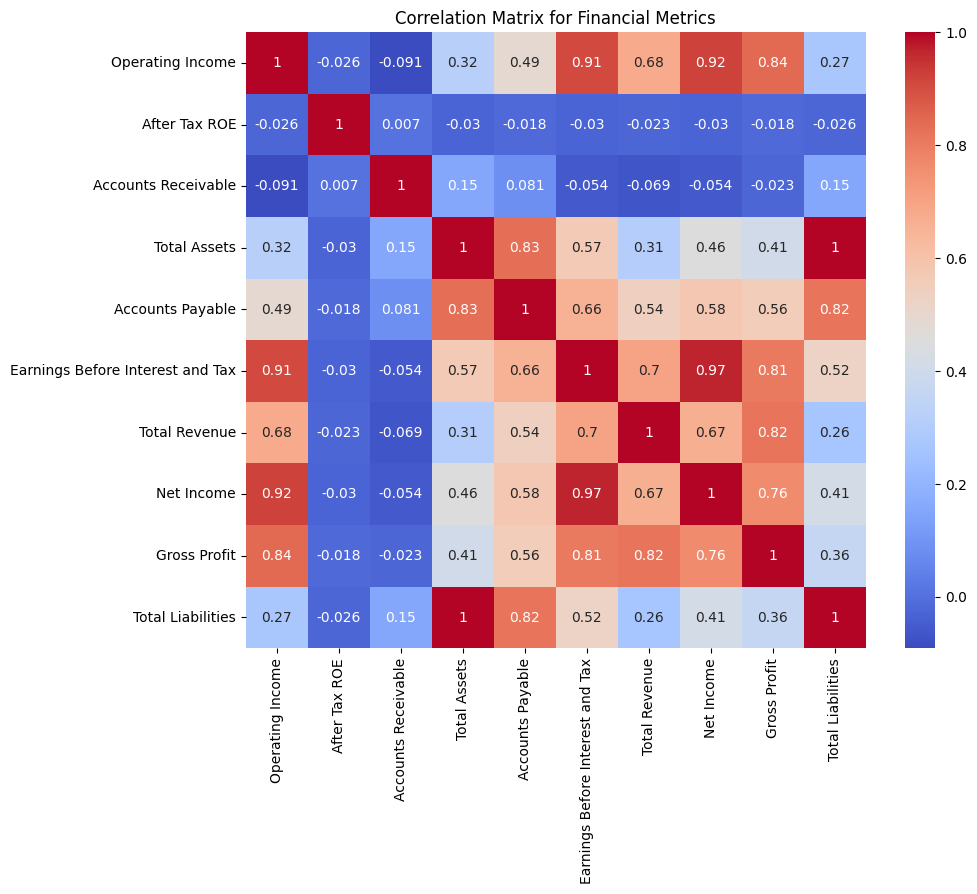

In [19]:
correlation_matrix = scaled_subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Financial Metrics')
plt.show()

### Finding Ideal number of Clusters

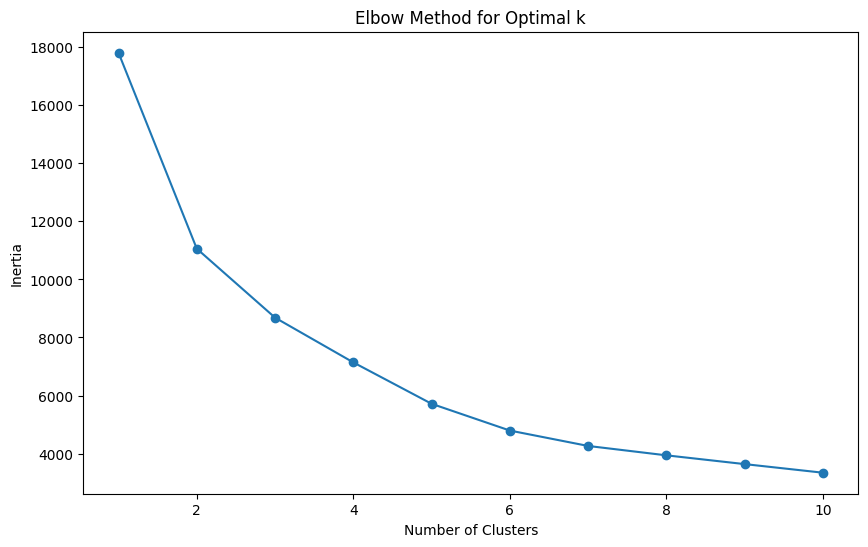

In [65]:
# Finding ideal number of clusters using the elbow method
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_subset_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Preparing the data for Clustering analysis

In [146]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

cluster_df = cleaned_fundamentals_df[list(high_cors_columns)].copy()
cluster_df = imputer.fit_transform(cluster_df)
cluster_df = scaler.fit_transform(cluster_df)
cluster_df


array([[-0.41916401, -0.08809327, -0.2095914 , ..., -0.89711069,
         0.52683102, -0.10411729],
       [-0.17193193,  0.10005481, -0.03897162, ..., -0.88659039,
         0.62738995,  0.00663242],
       [ 0.39130662,  0.42503786, -0.12758809, ...,  0.29468964,
         1.45847125, -0.01431413],
       ...,
       [-0.26185247,  0.00170467,  0.17529508, ..., -0.28117185,
        -0.30292713, -0.21209248],
       [-0.30019222, -0.04960844,  0.00732057, ..., -0.34228981,
        -0.30594096, -0.20346063],
       [-0.17331532,  0.0487417 ,  0.10387285, ..., -0.22155678,
        -0.2916069 , -0.20722055]])

In [147]:
len(cleaned_fundamentals_df[list(high_cors_columns)].columns)

10

In [165]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_clusters = kmeans.fit_transform(cluster_df)
clusters = kmeans.fit_predict(cluster_df)

In [166]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

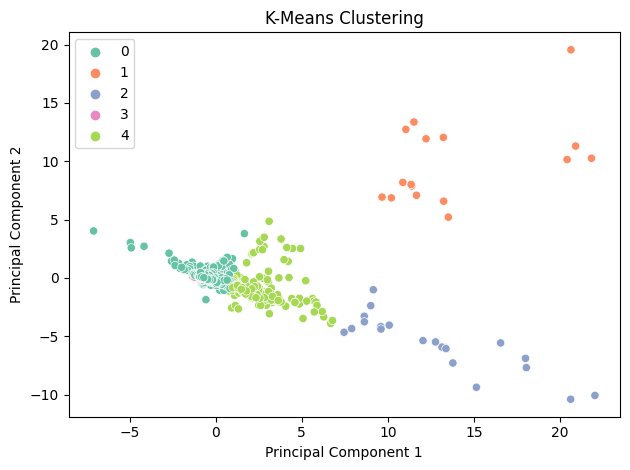

In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
cluster_data_pca = pca.fit_transform(cluster_df)

sns.scatterplot(x=cluster_data_pca[:,0], y=cluster_data_pca[:,1], hue=clusters, palette="Set2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

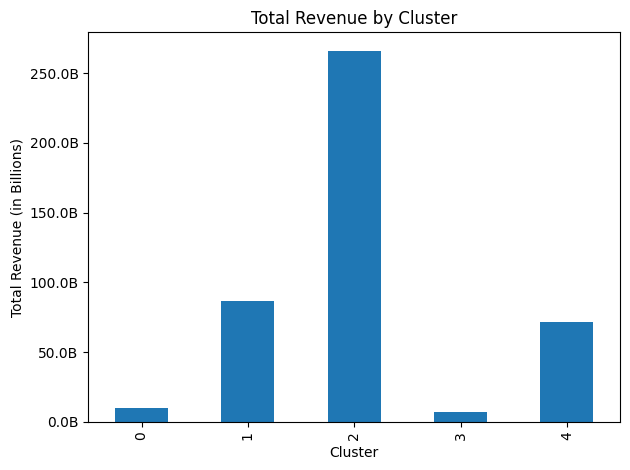

In [168]:
fundamentals_df['Cluster'] = clusters

group_by_cluster = fundamentals_df.groupby('Cluster')['Ticker Symbol'].apply(list)

numeric_columns = fundamentals_df.select_dtypes(include=['float64', 'int64']).columns
cluster_means = fundamentals_df.groupby('Cluster')[numeric_columns].mean()

cluster_means['Total Revenue'].plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue (in Billions)')
plt.title('Total Revenue by Cluster')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))

plt.show()

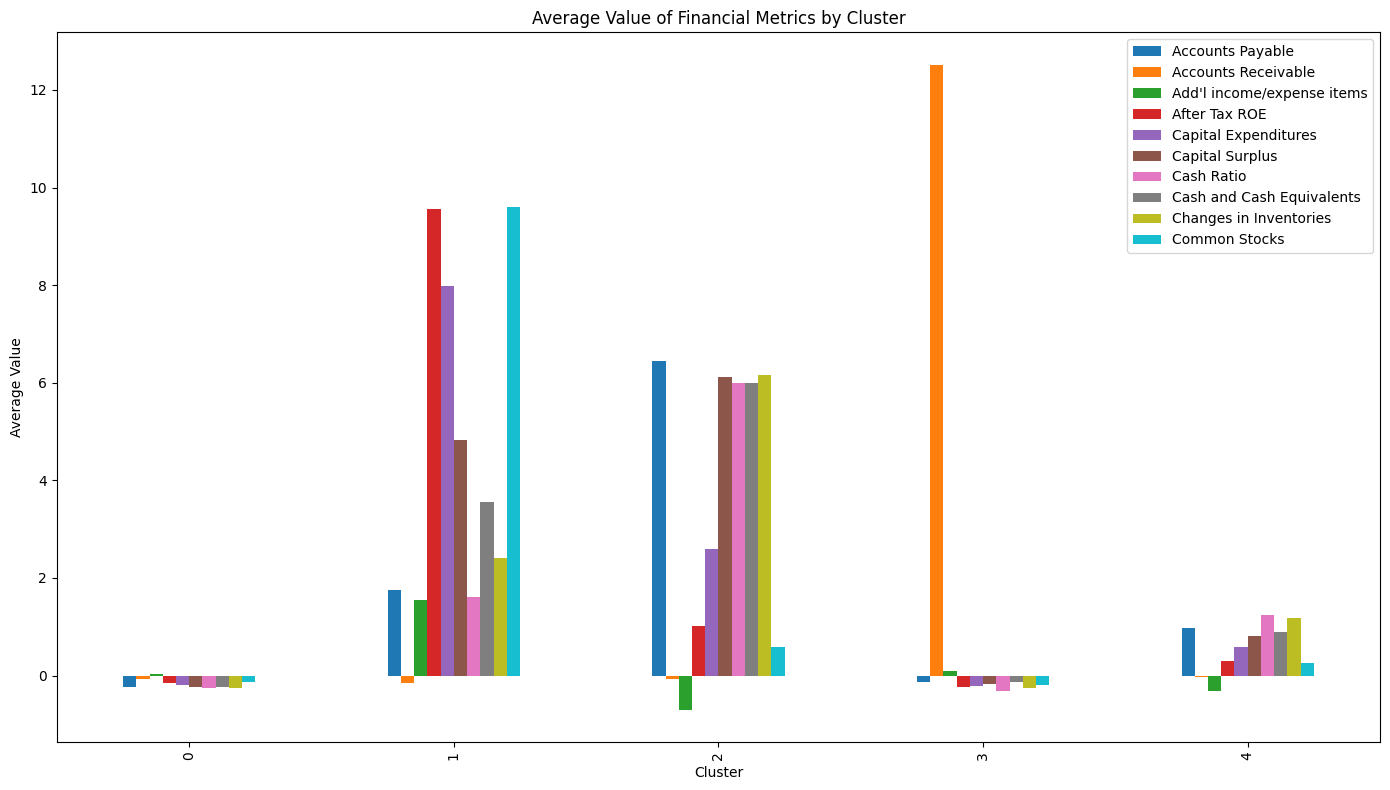

In [169]:

cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers)

cluster_centers_df.plot(kind='bar', figsize=(14,8))
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Value of Financial Metrics by Cluster')
plt.legend(list(cluster_means.columns), loc='upper right')
plt.show()


In [170]:
fundamentals_df['Cluster'].value_counts()

Cluster
0    1537
4     198
2      21
1      16
3       9
Name: count, dtype: int64

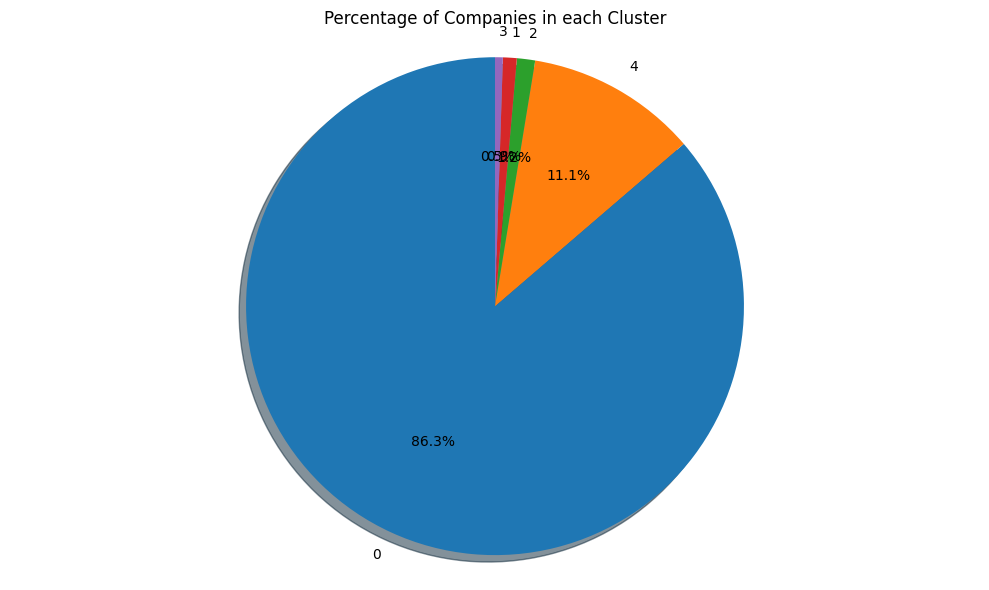

In [171]:
cluster_counts = fundamentals_df['Cluster'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

plt.title('Percentage of Companies in each Cluster')
plt.show()

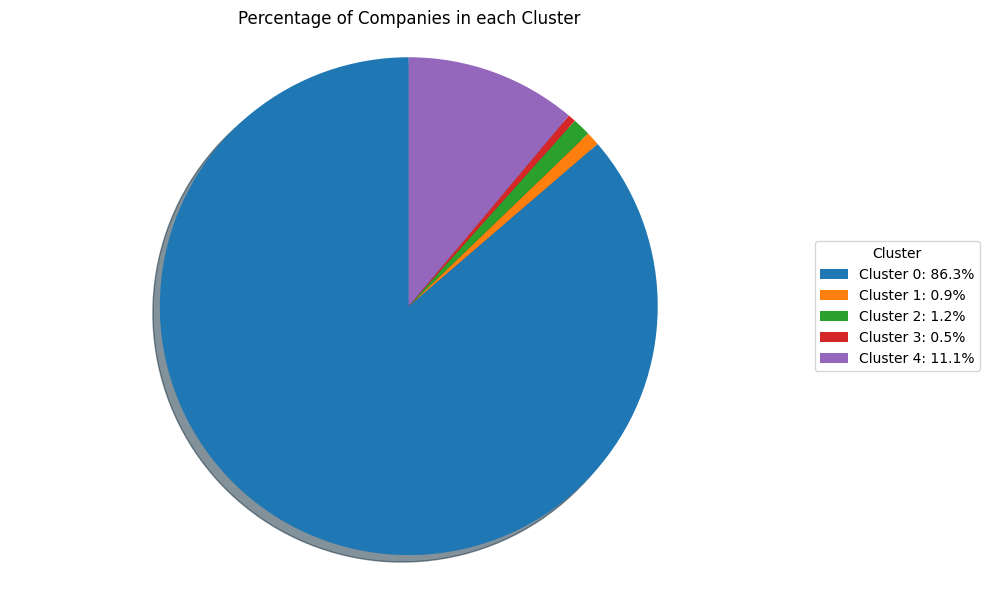

In [172]:
cluster_counts = fundamentals_df['Cluster'].value_counts()
cluster_counts = cluster_counts.sort_index()
labels = ['Cluster {}: {:.1f}%'.format(i, pct) for i, pct in zip(cluster_counts.index, (cluster_counts / cluster_counts.sum()) * 100)]

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts = ax.pie(cluster_counts, startangle=90, shadow=True)
ax.legend(wedges, labels, title='Cluster', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.title('Percentage of Companies in each Cluster')
plt.show()

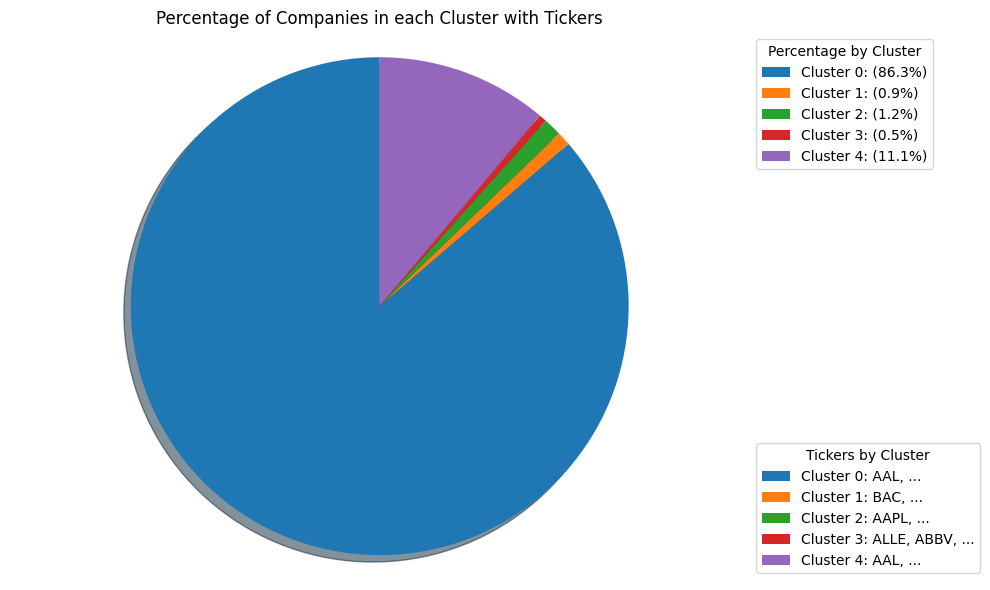

In [173]:
cluster_counts = fundamentals_df['Cluster'].value_counts().sort_index()

# Create custom labels for the percentage values
percentage_labels = [f'Cluster {i}: ({count / len(fundamentals_df) * 100:.1f}%)' for i, count in enumerate(cluster_counts)]

# Create separate custom labels for the tickers
ticker_labels = []
for i in range(len(cluster_counts)):
    tickers = group_by_cluster[i]
    tickers_str = ', '.join(set(tickers[:2])) + (', ...' if len(tickers) > 2 else '')  # Show only 2 tickers per cluster
    ticker_labels.append(f'Cluster {i}: {tickers_str}')

# Plot pie chart with percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts = ax.pie(cluster_counts, startangle=90, shadow=True)
ax.axis('equal')

# Create first legend with percentage labels
percentage_legend = ax.legend(wedges, percentage_labels, title='Percentage by Cluster', loc='upper left', bbox_to_anchor=(1, 1))

# Create second legend with ticker labels
ticker_legend = ax.legend(wedges, ticker_labels, title='Tickers by Cluster', loc='lower left', bbox_to_anchor=(1, 0))
ax.add_artist(percentage_legend)  # Add the first legend back

plt.title('Percentage of Companies in each Cluster with Tickers')
plt.show()

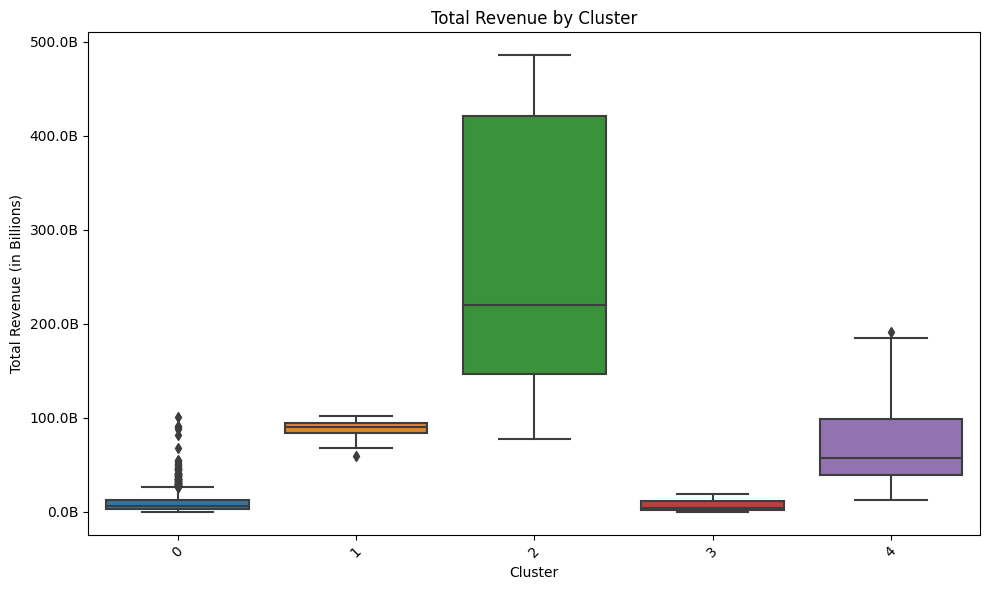

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total Revenue', data=fundamentals_df)

plt.title('Total Revenue by Cluster')
plt.ylabel('Total Revenue (in Billions)')
plt.xlabel('Cluster')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))

plt.show()

In [177]:
fundamentals_df.columns

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

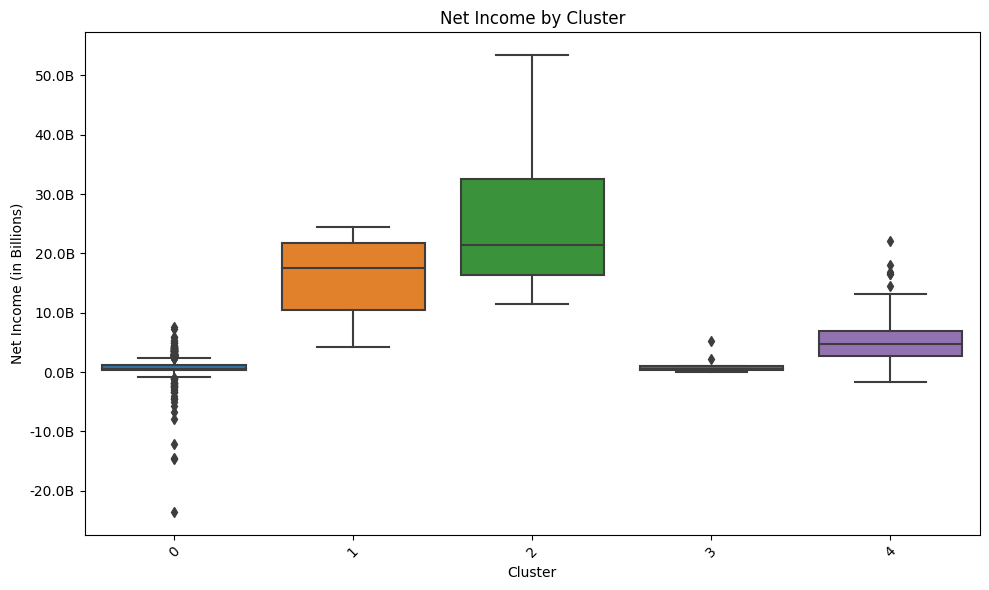

In [181]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Net Income', data=fundamentals_df)

plt.title('Net Income by Cluster')
plt.ylabel('Net Income (in Billions)')
plt.xlabel('Cluster')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))

plt.show()

In [116]:
fundamentals_df['Cluster'] = clusters

group_by_cluster = fundamentals_df.groupby('Cluster')['Ticker Symbol'].apply(list)

for cluster_num, tickers in group_by_cluster.items():
    print(f"Cluster {cluster_num}:")
    print(tickers)
    print("\n")


Cluster 0:
['AAL', 'AAL', 'AAP', 'AAP', 'AAP', 'AAP', 'ABBV', 'ABBV', 'ABC', 'ABT', 'ABT', 'ABT', 'ABT', 'ADBE', 'ADBE', 'ADBE', 'ADBE', 'ADI', 'ADI', 'ADI', 'ADI', 'ADM', 'ADM', 'ADM', 'ADM', 'ADS', 'ADS', 'ADS', 'ADS', 'ADSK', 'ADSK', 'ADSK', 'ADSK', 'AEE', 'AEE', 'AEE', 'AEE', 'AEP', 'AEP', 'AEP', 'AEP', 'AFL', 'AFL', 'AFL', 'AFL', 'AIV', 'AIV', 'AIV', 'AIV', 'AIZ', 'AIZ', 'AIZ', 'AIZ', 'AJG', 'AJG', 'AJG', 'AJG', 'AKAM', 'AKAM', 'AKAM', 'AKAM', 'ALB', 'ALB', 'ALB', 'ALB', 'ALK', 'ALK', 'ALK', 'ALK', 'ALL', 'ALL', 'ALL', 'ALLE', 'ALLE', 'ALLE', 'ALXN', 'ALXN', 'ALXN', 'ALXN', 'AMAT', 'AMAT', 'AMAT', 'AMAT', 'AME', 'AME', 'AME', 'AME', 'AMG', 'AMG', 'AMG', 'AMG', 'AMP', 'AMP', 'AMP', 'AMP', 'AMT', 'AMT', 'AMT', 'AMT', 'AN', 'AN', 'AN', 'AN', 'AON', 'AON', 'AON', 'AON', 'APA', 'APA', 'APA', 'APA', 'APC', 'APC', 'APC', 'APC', 'APD', 'APD', 'APD', 'APD', 'APH', 'APH', 'APH', 'APH', 'ARNC', 'ARNC', 'ARNC', 'ARNC', 'ATVI', 'ATVI', 'ATVI', 'ATVI', 'AVB', 'AVB', 'AVB', 'AVB', 'AVGO', 'AVGO'

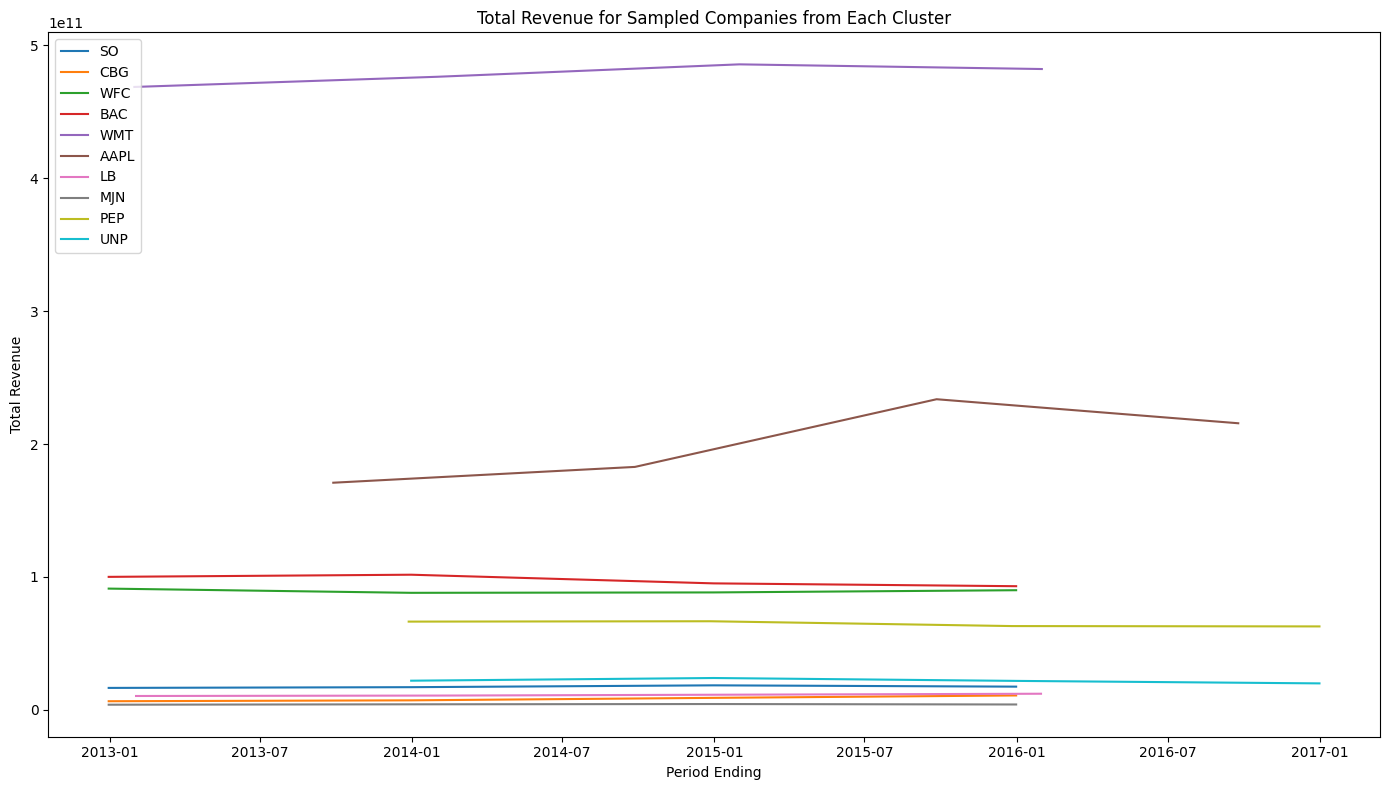

In [117]:
import random
import matplotlib.pyplot as plt

# Sample a couple of tickers from each cluster
sampled_tickers = group_by_cluster.apply(lambda x: random.sample(x, min(2, len(x))))

# Filter the price data or financial data for the sampled tickers
sampled_tickers_list = [ticker for sublist in sampled_tickers for ticker in sublist]
filtered_df = fundamentals_df[fundamentals_df['Ticker Symbol'].isin(sampled_tickers_list)]

# Plot the data: Example with Total Revenue
plt.figure(figsize=(14, 8))

for ticker in sampled_tickers_list:
    ticker_data = filtered_df[filtered_df['Ticker Symbol'] == ticker]
    plt.plot(ticker_data['Period Ending'], ticker_data['Total Revenue'], label=ticker)

plt.xlabel('Period Ending')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for Sampled Companies from Each Cluster')
plt.legend(loc='upper left')
plt.show()


### Prices

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [32]:
prices_path = os.path.join(os.getcwd(), 'Dataset', 'NYSE_Dataset', 'prices-split-adjusted.csv')
prices_df = pd.read_csv(prices_path)

In [33]:
prices_df.head(n=1)

date symbol    open       close         low    high     volume
0  2016-01-05   WLTW  123.43  125.839996  122.309998  126.25  2163600.0

In [34]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


## Data Cleaning and Wrangling

In [35]:
prices_df['date'] = pd.to_datetime(prices_df['date'])

In [36]:
prices_df.describe()

date           open          close  \
count                         851264  851264.000000  851264.000000   
mean   2013-07-21 02:56:29.294037760      64.993618      65.011913   
min              2010-01-04 00:00:00       1.660000       1.590000   
25%              2011-10-19 00:00:00      31.270000      31.292776   
50%              2013-08-02 00:00:00      48.459999      48.480000   
75%              2015-04-24 00:00:00      75.120003      75.139999   
max              2016-12-30 00:00:00    1584.439941    1578.130005   
std                              NaN      75.203893      75.201216   

                 low           high        volume  
count  851264.000000  851264.000000  8.512640e+05  
mean       64.336541      65.639748  5.415113e+06  
min         1.500000       1.810000  0.000000e+00  
25%        30.940001      31.620001  1.221500e+06  
50%        47.970001      48.959999  2.476250e+06  
75%        74.400002      75.849998  5.222500e+06  
max      1549.939941    1600.930054  8.596434e+08  
std        74.459518      75.906861  1.249468e+07

In [37]:
# Check for duplicates
prices_df.duplicated().sum()

0

In [38]:
# Check for missing values
prices_df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

### EDA

In [39]:
prices_df['symbol']

0         WLTW
1         WLTW
2         WLTW
3         WLTW
4         WLTW
          ... 
851259     ZBH
851260    ZION
851261     ZTS
851262     AIV
851263     FTV
Name: symbol, Length: 851264, dtype: object

In [40]:
# For simplicity, we will focus on 2 stocks: AAPL and NVDA

# Filter for AAPL and NVDA
aapl_nvda_df = prices_df[(prices_df['symbol'] == 'AAPL') | (prices_df['symbol'] == 'NVDA')]
aapl_nvda_df.head()

date symbol       open      close        low       high  \
254  2010-01-04   AAPL  30.490000  30.572857  30.340000  30.642857   
566  2010-01-04   NVDA  18.510000  18.490000  18.110001  18.620001   
721  2010-01-05   AAPL  30.657143  30.625713  30.464285  30.798571   
1034 2010-01-05   NVDA  18.420000  18.760000  18.420000  18.959999   
1189 2010-01-06   AAPL  30.625713  30.138571  30.107143  30.747143   

           volume  
254   123432400.0  
566    20005100.0  
721   150476200.0  
1034   18216200.0  
1189  138040000.0

In [41]:
aapl_nvda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3524 entries, 254 to 851100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3524 non-null   datetime64[ns]
 1   symbol  3524 non-null   object        
 2   open    3524 non-null   float64       
 3   close   3524 non-null   float64       
 4   low     3524 non-null   float64       
 5   high    3524 non-null   float64       
 6   volume  3524 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 220.2+ KB


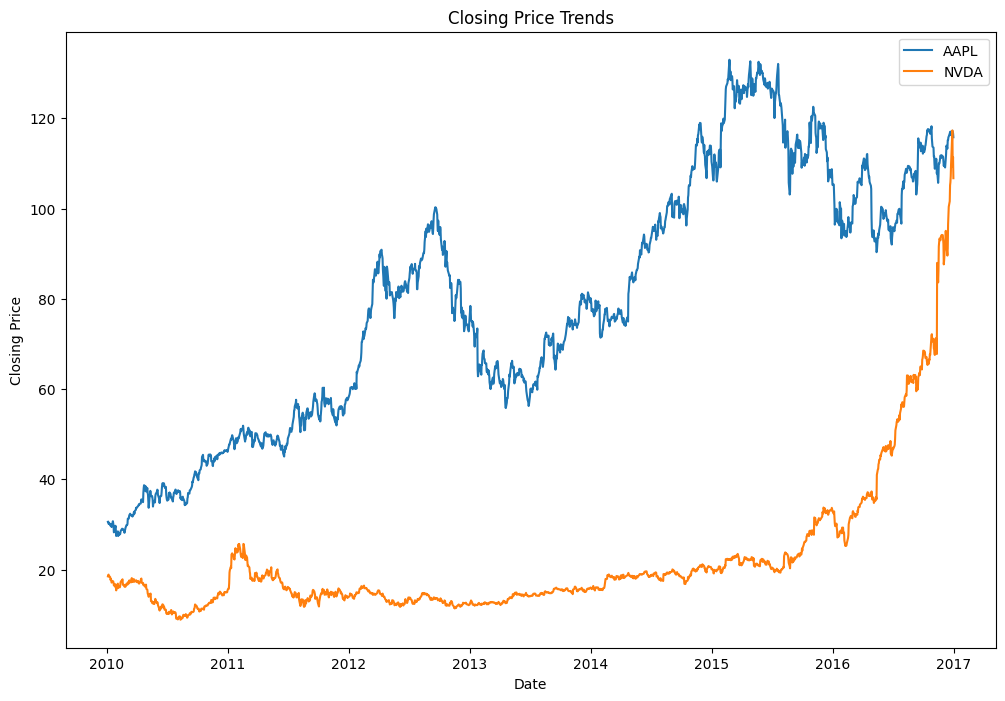

In [42]:
# Plotting closing price trends for the selected stocks

plt.figure(figsize=(12, 8))
for ticker in aapl_nvda_df['symbol'].unique():
    subset_df = aapl_nvda_df[aapl_nvda_df['symbol'] == ticker]
    plt.plot(subset_df['date'], subset_df['close'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Trends')
plt.legend()
plt.show()

In [43]:
# Summary statistics for the 'close' prices and 'volume'
summary_stats_close = aapl_nvda_df['close'].describe()
summary_stats_volume = aapl_nvda_df['volume'].describe()

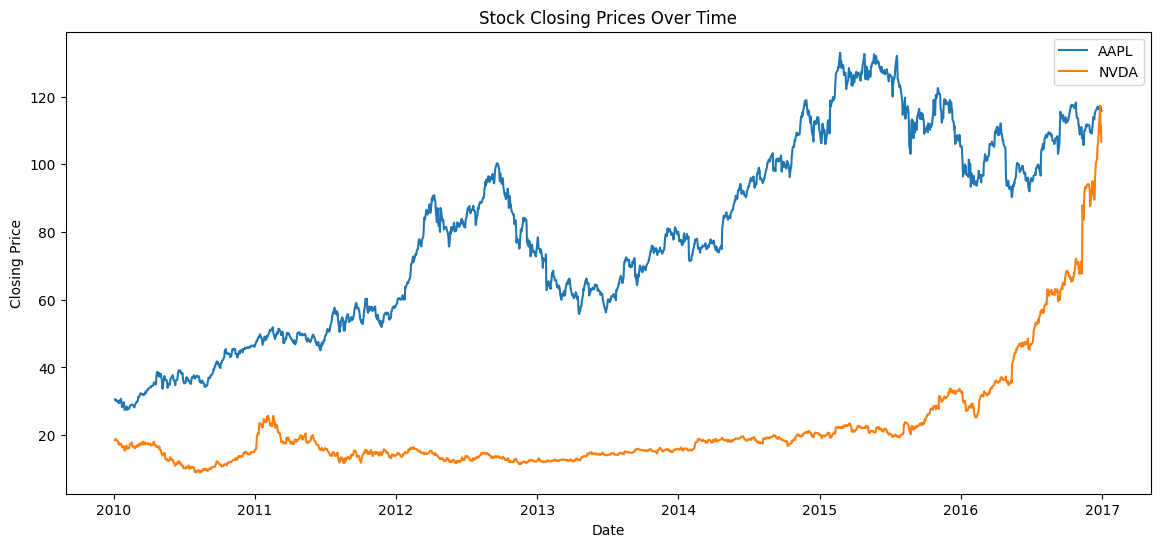

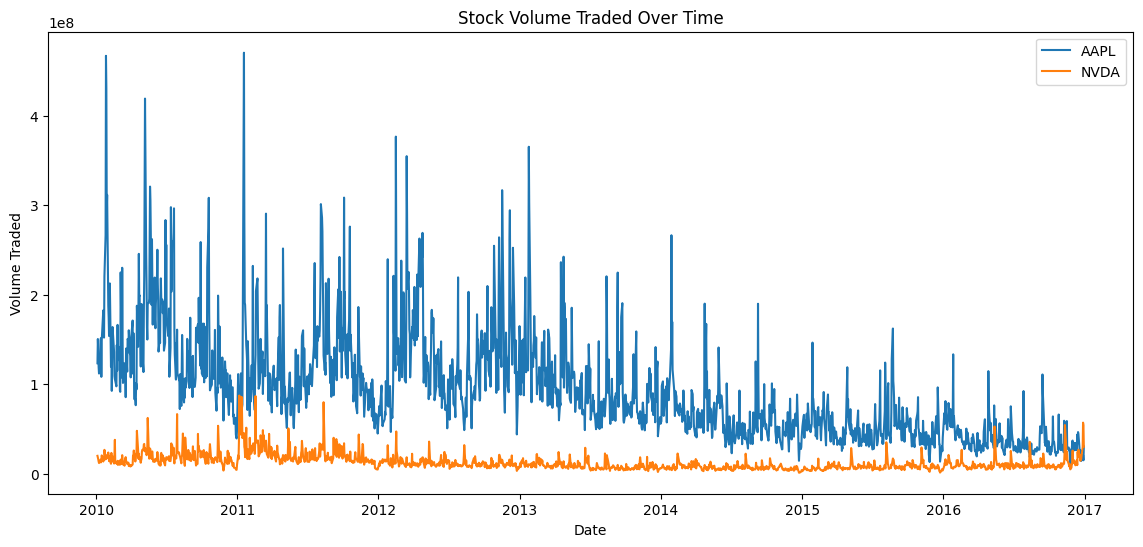

In [44]:
# Plotting closing price trends for the sample companies
plt.figure(figsize=(14, 6))
for ticker in aapl_nvda_df['symbol'].unique():
    subset = aapl_nvda_df[aapl_nvda_df['symbol'] == ticker]
    plt.plot(subset['date'], subset['close'], label=ticker)
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plotting volume traded for the sample companies
plt.figure(figsize=(14, 6))
for ticker in aapl_nvda_df['symbol'].unique():
    subset = aapl_nvda_df[aapl_nvda_df['symbol'] == ticker]
    plt.plot(subset['date'], subset['volume'], label=ticker)
plt.title('Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.legend()
plt.show()

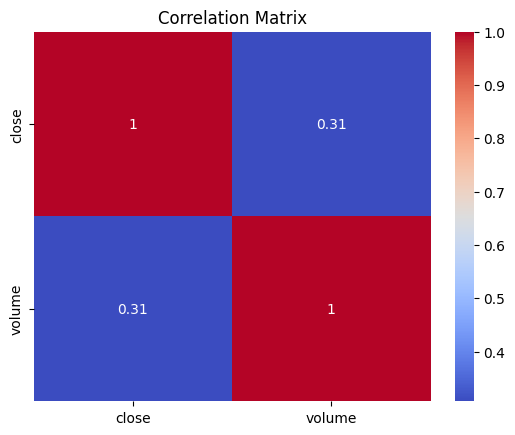

In [45]:
# Correlation matrix of closing prices and volume
correlation_matrix = aapl_nvda_df[['close', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
# For simplicity, we'll use the closing price as the feature to predict the next closing price
# We'll create a new column 'previous_close' that shifts the 'close' column by 1 day
aapl_nvda_df['previous_close'] = aapl_nvda_df.groupby('symbol')['close'].shift(1)

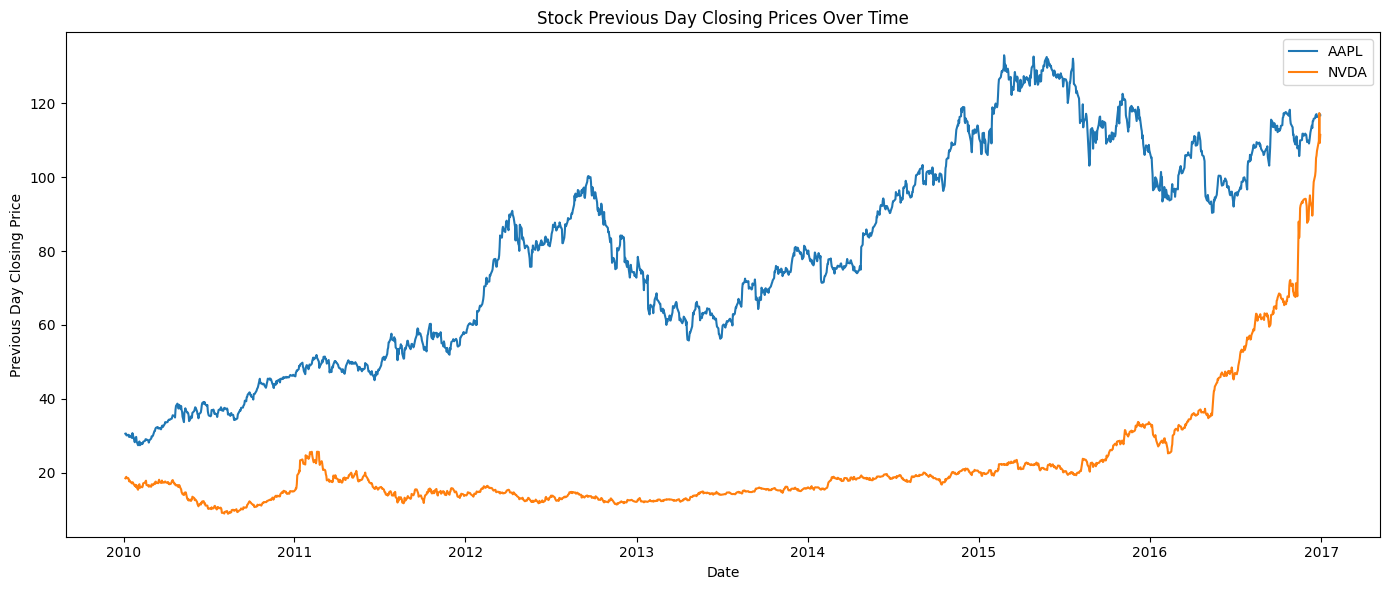

In [135]:
# Plotting closing price trends for the sample companies
plt.figure(figsize=(14, 6))
for ticker in aapl_nvda_df['symbol'].unique():
    subset = aapl_nvda_df[aapl_nvda_df['symbol'] == ticker]
    plt.plot(subset['date'], subset['previous_close'], label=ticker)
plt.title('Stock Previous Day Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Previous Day Closing Price')
plt.legend()
plt.show()


In [48]:
# Drop the rows with missing values
aapl_nvda_df.dropna(inplace=True)

In [139]:
aapl_nvda_df.symbol

721       AAPL
1034      NVDA
1189      AAPL
1502      NVDA
1657      AAPL
          ... 
850100    NVDA
850267    AAPL
850600    NVDA
850767    AAPL
851100    NVDA
Name: symbol, Length: 3522, dtype: object

In [49]:
# Separate into features and target
X = aapl_nvda_df['previous_close'].values.reshape(-1, 1)
y = aapl_nvda_df['close'].values.reshape(-1, 1)

In [50]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
# Linear regression model

linear = LinearRegression()
linear.fit(X_train, y_train)

# Predictions
y_pred = linear.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 1.0824866842846266


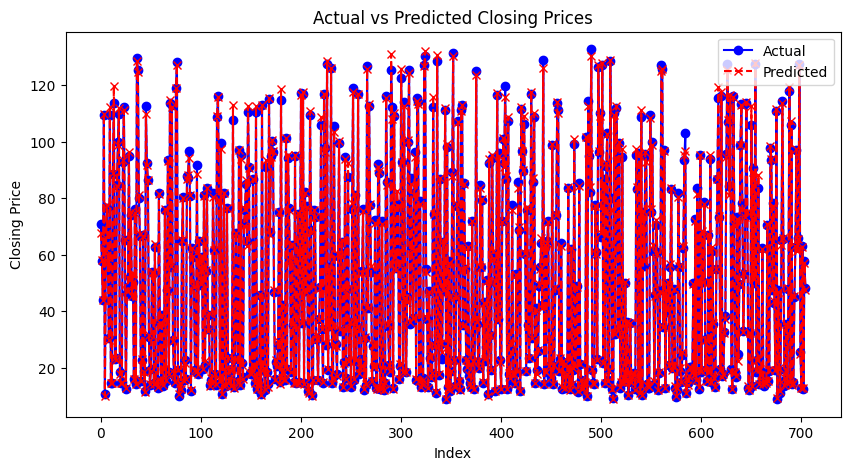

In [52]:
# Create an index array, same length as y_test
index_array = np.arange(len(y_test))

# Assuming y_test and y_pred are numpy arrays and have the same length
plt.figure(figsize=(10, 5))

# Plot the actual closing prices
plt.plot(index_array, y_test, label='Actual', color='blue', marker='o')

# Plot the predicted closing prices
plt.plot(index_array, y_pred, label='Predicted', color='red', linestyle='--', marker='x')

# Label the plot
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


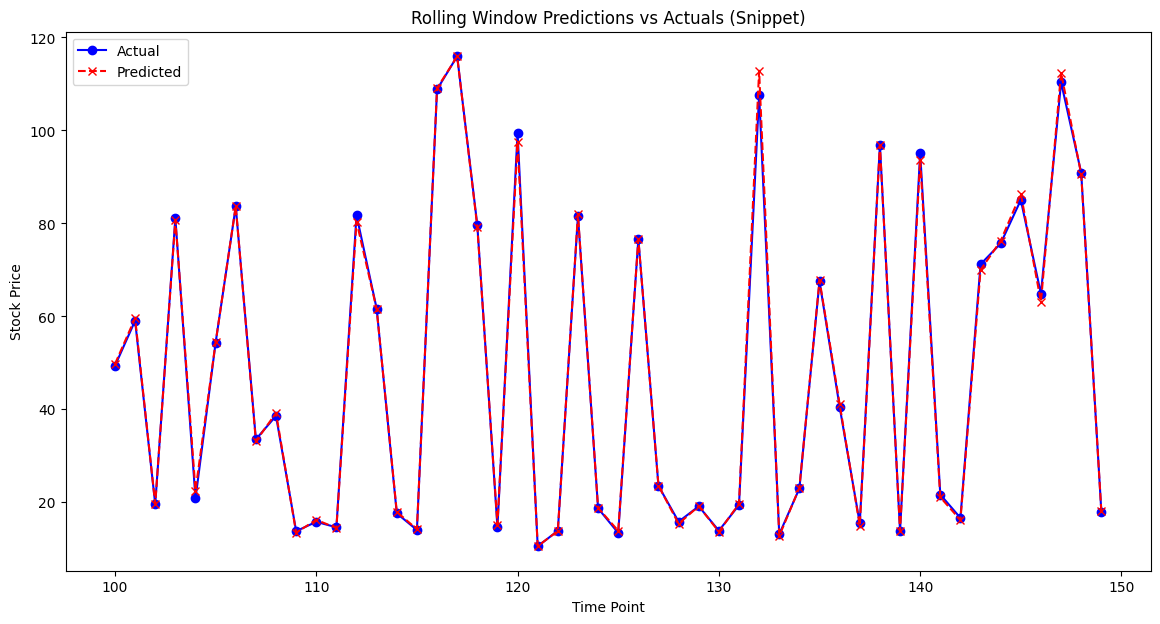

In [53]:
start_index = 100  
end_index = 150    
plt.figure(figsize=(14, 7))

plt.plot(range(start_index, end_index), y_test[start_index:end_index], label='Actual', color='blue', marker='o')

# Plot the rolling predictions for the snippet
plt.plot(range(start_index, end_index), y_pred[start_index:end_index], label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Rolling Window Predictions vs Actuals (Snippet)')
plt.xlabel('Time Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [54]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = linear.score(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9991419873871008


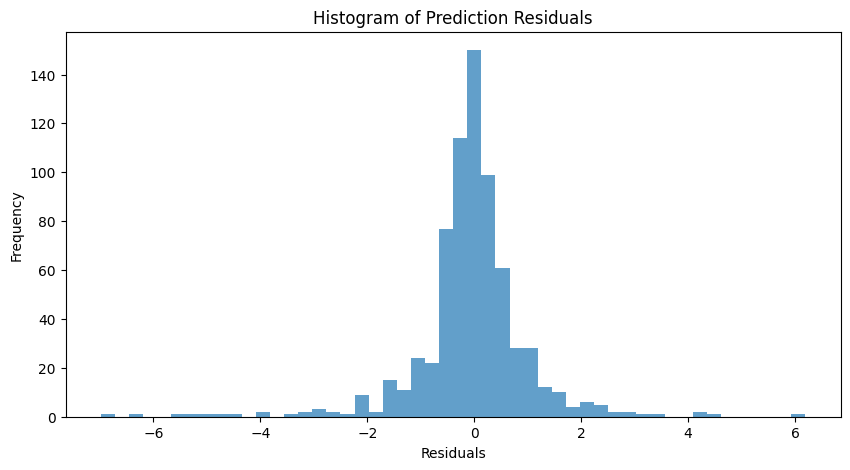

In [55]:
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Histogram of Prediction Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [56]:
# Calculate the error metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: {}'.format(mae))
print('Mean Squared Error: {}'.format(mse))
print('Root Mean Squared Error: {}'.format(rmse))

Mean Absolute Error: 0.6527191251165855
Mean Squared Error: 1.1717774216535248
Root Mean Squared Error: 1.0824866842846266


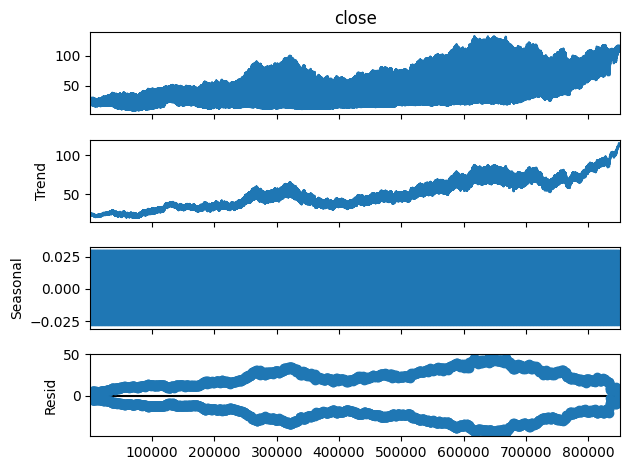

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal and residual components
residuals = residuals[:259].reshape(-1, )

index = pd.date_range(start='2016-01-05', end='2016-12-30', freq='B')
residual_series = pd.Series(residuals, index=index)

decomposition = seasonal_decompose(aapl_nvda_df['close'], model='additive', period=5)
decomposition.plot()
plt.show()


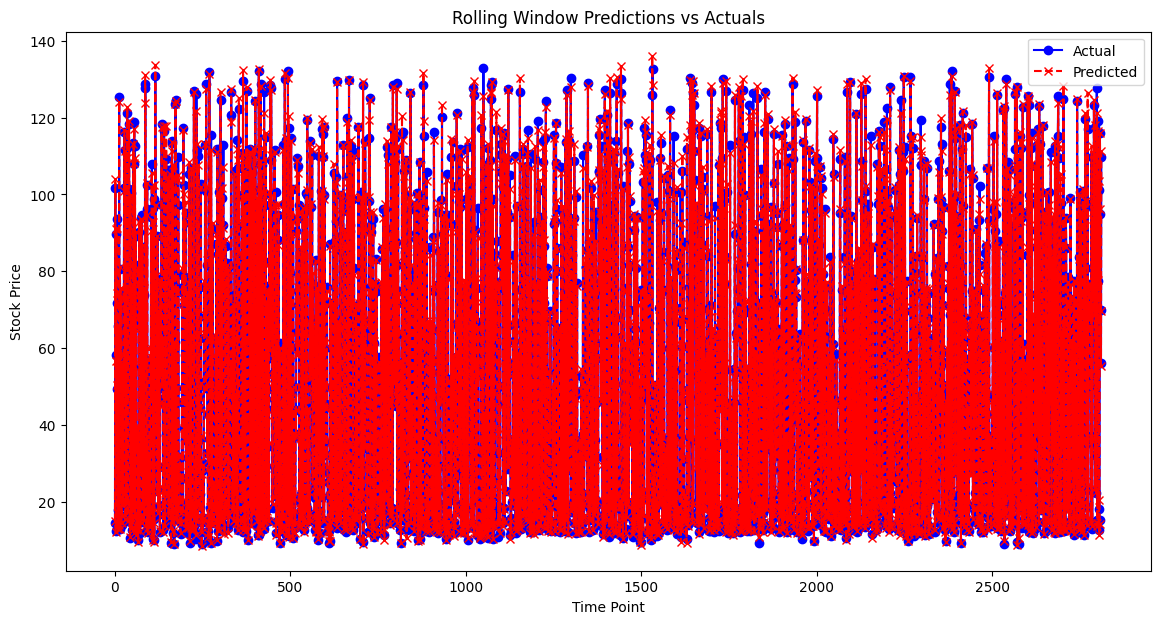

In [58]:
window_size = 5  

rolling_predictions = []
rolling_actuals = []

for end in range(window_size, len(X_train)):
    start = end - window_size
    
    train_subset = X_train[start:end]
    y_subset = y_train[start:end]
    
    model = LinearRegression().fit(train_subset, y_subset)
    
    actual = y_train[end:end+1][0]
    pred = model.predict(X_train[end:end+1])[0]
    
    rolling_predictions.append(pred)
    rolling_actuals.append(actual)


plt.figure(figsize=(14, 7))
plt.plot(rolling_actuals, label='Actual', color='blue', marker='o')
plt.plot(rolling_predictions, label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Rolling Window Predictions vs Actuals')
plt.xlabel('Time Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the RMSE
rolling_rmse = np.sqrt(mean_squared_error(rolling_actuals, rolling_predictions))
print(f"Rolling Window RMSE: {rolling_rmse}")

Rolling Window RMSE: 1.4957295331349851


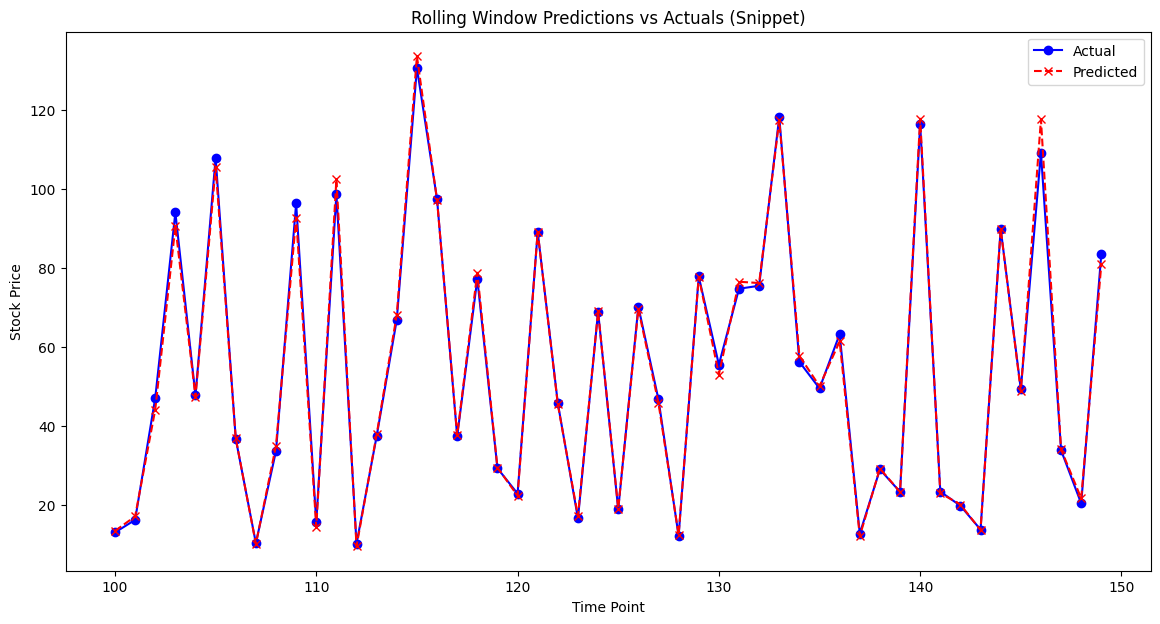

In [60]:
start_index = 100  
end_index = 150    

plt.figure(figsize=(14, 7))
plt.plot(range(start_index, end_index), rolling_actuals[start_index:end_index], label='Actual', color='blue', marker='o')

plt.plot(range(start_index, end_index), rolling_predictions[start_index:end_index], label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Rolling Window Predictions vs Actuals (Snippet)')
plt.xlabel('Time Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [61]:
# Running with SVR and Random Forest Regressor

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# SVR model
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

# Evaluating the models performance using accuracy and RMSE
svr_accuracy = svr.score(X_test, y_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))


print('SVR Accuracy: {}'.format(svr_accuracy))
print('SVR RMSE: {}'.format(svr_rmse))


SVR Accuracy: 0.998630772933041
SVR RMSE: 1.3674563257600811


In [62]:
# Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


rf_accuracy = rf.score(X_test, y_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print('Random Forest Accuracy: {}'.format(rf_accuracy))
print('Random Forest RMSE: {}'.format(rf_rmse))


Random Forest Accuracy: 0.9983888922809974
Random Forest RMSE: 1.4833308047928233


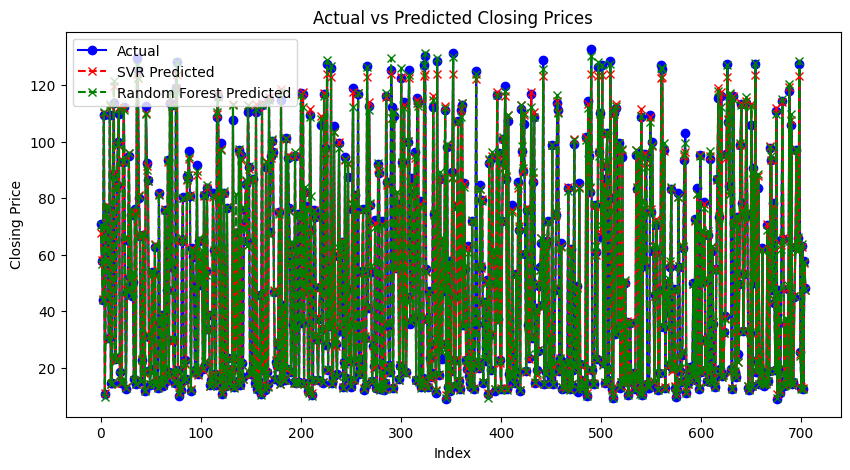

In [63]:

# Plotting the actual vs predicted closing prices for SVR and Random Forest Regressor
plt.figure(figsize=(10, 5))

plt.plot(index_array, y_test, label='Actual', color='blue', marker='o')
plt.plot(index_array, svr_pred, label='SVR Predicted', color='red', linestyle='--', marker='x')
plt.plot(index_array, rf_pred, label='Random Forest Predicted', color='green', linestyle='--', marker='x')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

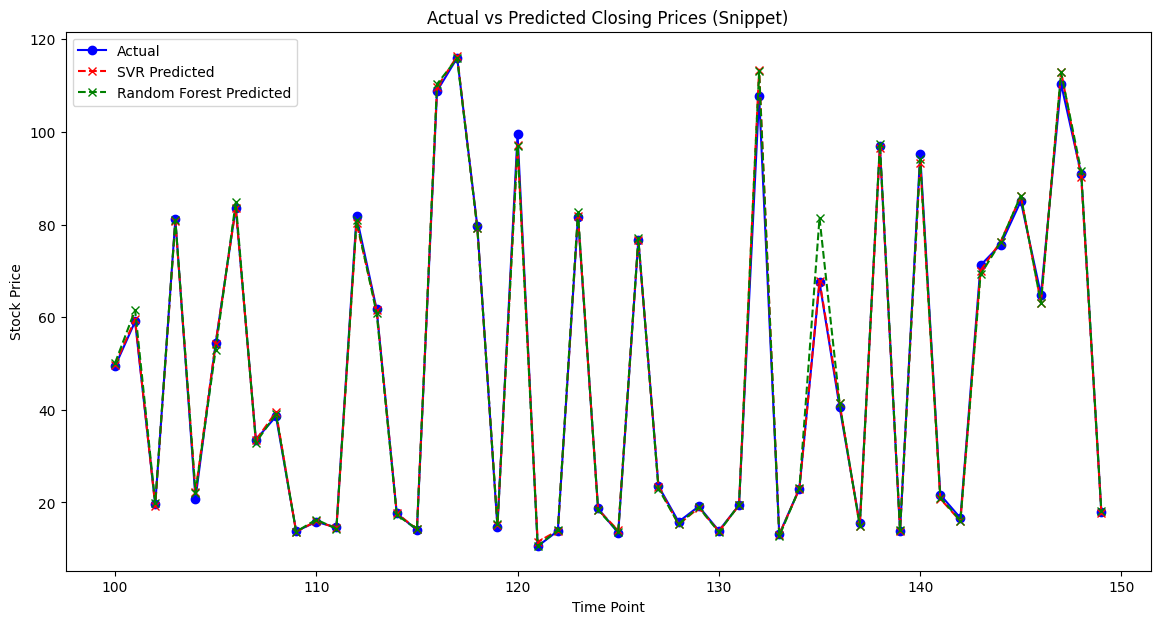

In [64]:
# plotting snippet of the actual vs predicted closing prices for SVR and Random Forest Regressor
start_index = 100
end_index = 150

plt.figure(figsize=(14, 7))

plt.plot(range(start_index, end_index), y_test[start_index:end_index], label='Actual', color='blue', marker='o')
plt.plot(range(start_index, end_index), svr_pred[start_index:end_index], label='SVR Predicted', color='red', linestyle='--', marker='x')
plt.plot(range(start_index, end_index), rf_pred[start_index:end_index], label='Random Forest Predicted', color='green', linestyle='--', marker='x')

plt.title('Actual vs Predicted Closing Prices (Snippet)')
plt.xlabel('Time Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


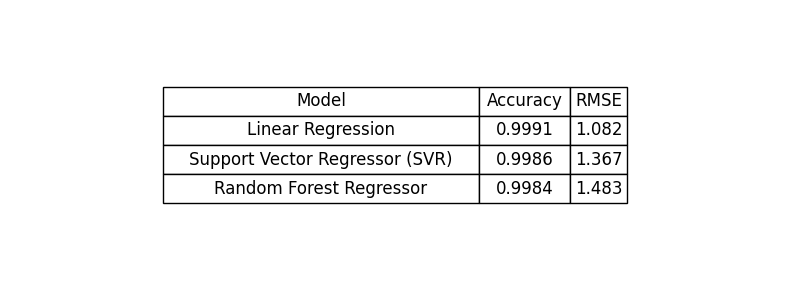

In [107]:
metrics_data = {
    "Model": ["Linear Regression", "Support Vector Regressor (SVR)", "Random Forest Regressor"],
    "Accuracy": [0.9991, 0.9986, 0.9984],
    "RMSE": [1.082, 1.367, 1.483]
}

metrics_df = pd.DataFrame(metrics_data)

fig, ax = plt.subplots(figsize=(8, 3))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

# Set column widths
table.auto_set_column_width([0, 1, 2])

plt.show()

# Combined Analysis

In [84]:
prices_mod_df = prices_df.copy()
prices_mod_df['previous_close'] = prices_mod_df.groupby('symbol')['close'].shift(1)
prices_mod_df.dropna(inplace=True)

In [85]:
prices_clusters_df = prices_mod_df.merge(fundamentals_df[['Ticker Symbol', 'Cluster']], left_on='symbol', right_on='Ticker Symbol')

In [86]:
prices_clusters_df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume',
       'previous_close', 'Ticker Symbol', 'Cluster'],
      dtype='object')

In [87]:
prices_clusters_df.head()

date symbol        open       close         low        high  \
0 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
1 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
3 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
4 2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   

      volume  previous_close Ticker Symbol  Cluster  
0  2386400.0      125.839996          WLTW        0  
1  2386400.0      125.839996          WLTW        0  
2  2386400.0      125.839996          WLTW        0  
3  2386400.0      125.839996          WLTW        0  
4  2489500.0      119.980003          WLTW        0

In [88]:
coefficients = {}

for cluster in prices_clusters_df['Cluster'].unique():
    cluster_data = prices_clusters_df[prices_clusters_df['Cluster'] == cluster]
    
    X = cluster_data['previous_close'].values.reshape(-1, 1)
    y = cluster_data['close']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression().fit(X_train, y_train)

    coefficients[cluster] = model.coef_
    
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"Cluster {cluster} RMSE: {rmse}")



Cluster 0 RMSE: 1.6171996899363907
Cluster 4 RMSE: 1.4608189265620413
Cluster 2 RMSE: 0.9797635993876952
Cluster 1 RMSE: 0.6568379071222381
Cluster 3 RMSE: 1.292307503805377


In [89]:
for cluster, coef in coefficients.items():
    print(f"Cluster {cluster} has regression coefficient: {coef}")
    print(cluster_means.loc[cluster])

Cluster 0 has regression coefficient: [1.00021316]
Accounts Payable                1.956994e+09
Accounts Receivable            -3.829123e+07
Add'l income/expense items      3.008631e+07
After Tax ROE                   2.806181e+01
Capital Expenditures           -8.055932e+08
                                    ...     
Total Revenue                   9.724418e+09
Treasury Stock                 -1.894664e+09
For Year                        2.013215e+03
Earnings Per Share              3.098132e+00
Estimated Shares Outstanding    3.611461e+08
Name: 0, Length: 76, dtype: float64
Cluster 4 has regression coefficient: [1.000372]
Accounts Payable                1.297697e+10
Accounts Receivable            -3.017020e+08
Add'l income/expense items      1.589285e+08
After Tax ROE                   3.578788e+01
Capital Expenditures           -2.863953e+09
                                    ...     
Total Revenue                   7.150818e+10
Treasury Stock                 -1.485861e+10
For Year 

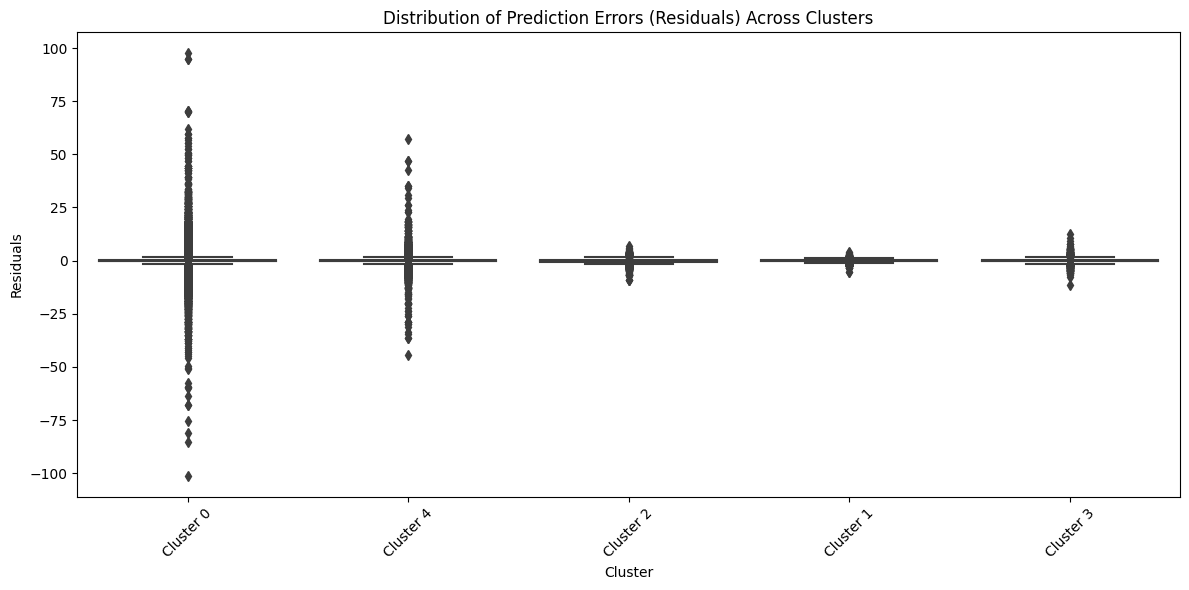

In [131]:
residuals_dict = {}

for cluster in prices_clusters_df['Cluster'].unique():
    cluster_data = prices_clusters_df[prices_clusters_df['Cluster'] == cluster]
    X = cluster_data['previous_close'].values.reshape(-1, 1)
    y = cluster_data['close']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)
    model = LinearRegression().fit(X_train, y_train)

    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    residuals_dict[cluster] = residuals

# Creating a DataFrame with residuals for each cluster
residuals_df = pd.DataFrame({f'Cluster {k}': v for k, v in residuals_dict.items()})

plt.figure(figsize=(12, 6))
sns.boxplot(data=residuals_df)
plt.title('Distribution of Prediction Errors (Residuals) Across Clusters')
plt.ylabel('Residuals')
plt.xlabel('Cluster')
plt.xticks(rotation=45)
plt.show()

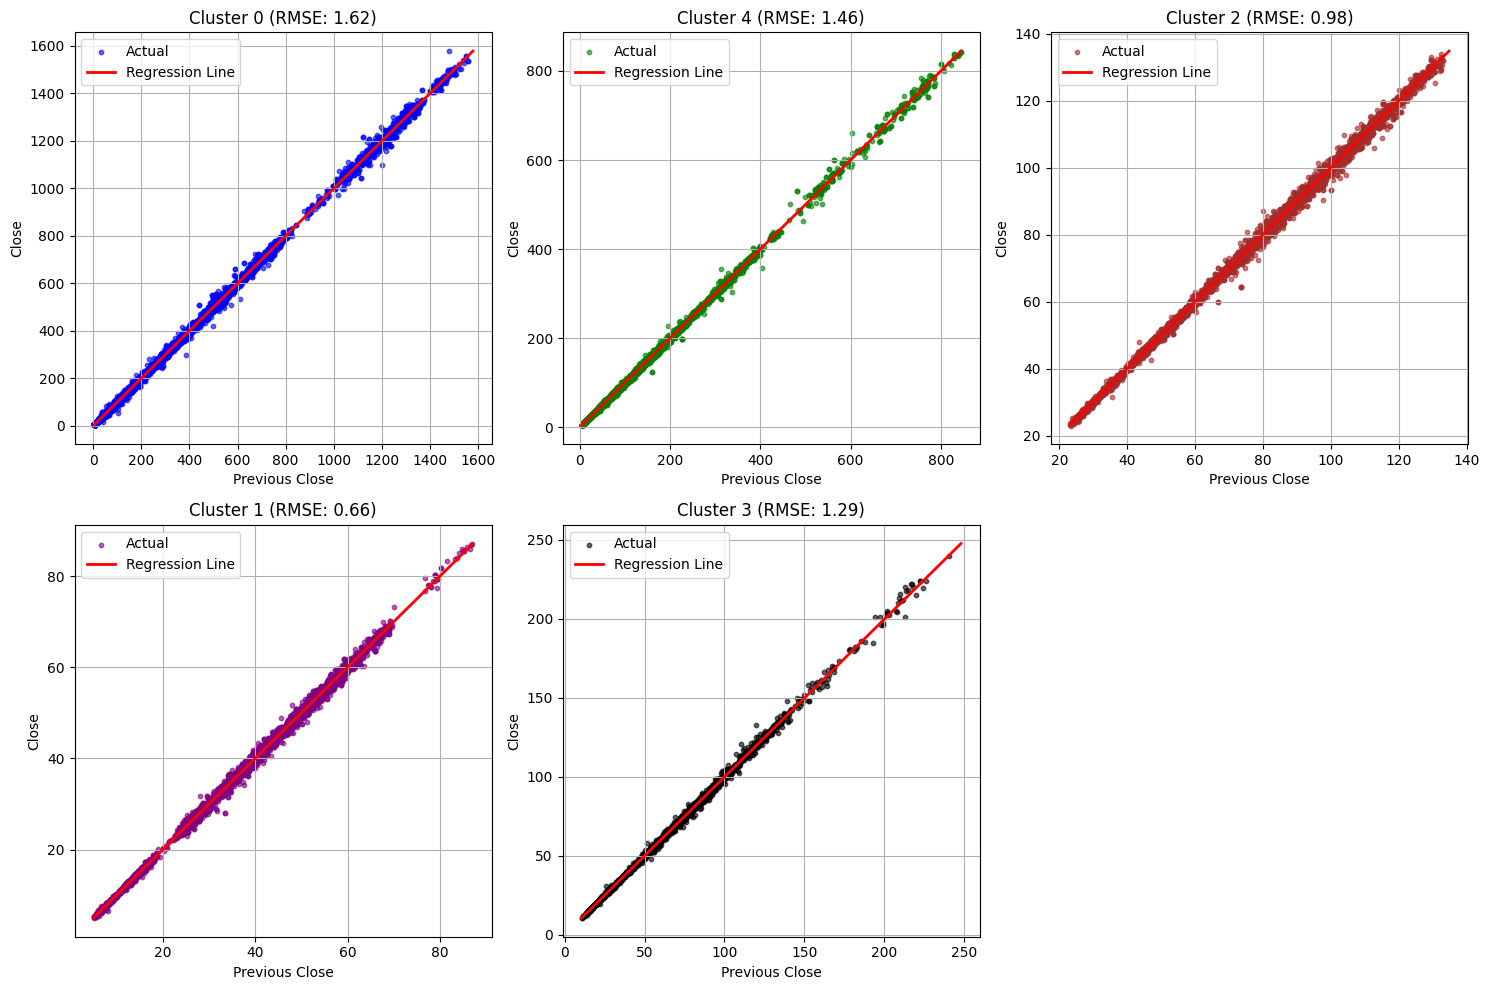

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


colors = ['blue', 'green', 'brown', 'purple', 'black']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.ravel()

coefficients = {}

for idx, cluster in enumerate(prices_clusters_df['Cluster'].unique()):
    ax = axes[idx]

    clusters_only_data_ = prices_clusters_df[prices_clusters_df['Cluster'] == cluster]
    X = clusters_only_data_['previous_close'].values.reshape(-1, 1)
    y = clusters_only_data_['close']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)
    model = LinearRegression().fit(X_train, y_train)
    coefficients[cluster] = model.coef_

    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    ax.scatter(X_test, y_test, color=colors[idx % len(
        colors)], alpha=0.6, s=10, label='Actual')

    line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    line_y = model.predict(line_X)
    ax.plot(line_X, line_y, color='red', linewidth=2, label='Regression Line')

    ax.set_title(f'Cluster {cluster} (RMSE: {rmse:.2f})')
    ax.set_xlabel('Previous Close')
    ax.set_ylabel('Close')
    ax.grid(True)
    ax.legend(loc='best')

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [91]:
# Plotting the candlestick chart using the prices_df dataframe and overlaying it with the cluster information

import plotly.graph_objects as go

prices_clusters_df['date'] = pd.to_datetime(prices_clusters_df['date'])

# Selecting a subset of the data for plotting
subset_df = prices_clusters_df[prices_clusters_df['symbol'].isin(['AAPL', 'NVDA'])]

fig = go.Figure(data=[go.Candlestick(x=subset_df['date'],
                open=subset_df['open'],
                high=subset_df['high'],
                low=subset_df['low'],
                close=subset_df['close'])])

# Adding cluster information to the plot
for cluster in subset_df['Cluster'].unique():
    cluster_data = subset_df[subset_df['Cluster'] == cluster]
    fig.add_trace(go.Scatter(x=cluster_data['date'], y=cluster_data['close'], mode='markers', name=f'Cluster {cluster}'))

fig.update_layout(title='Candlestick Chart with Cluster Information', xaxis_title='Date', yaxis_title='Price')
fig.show()



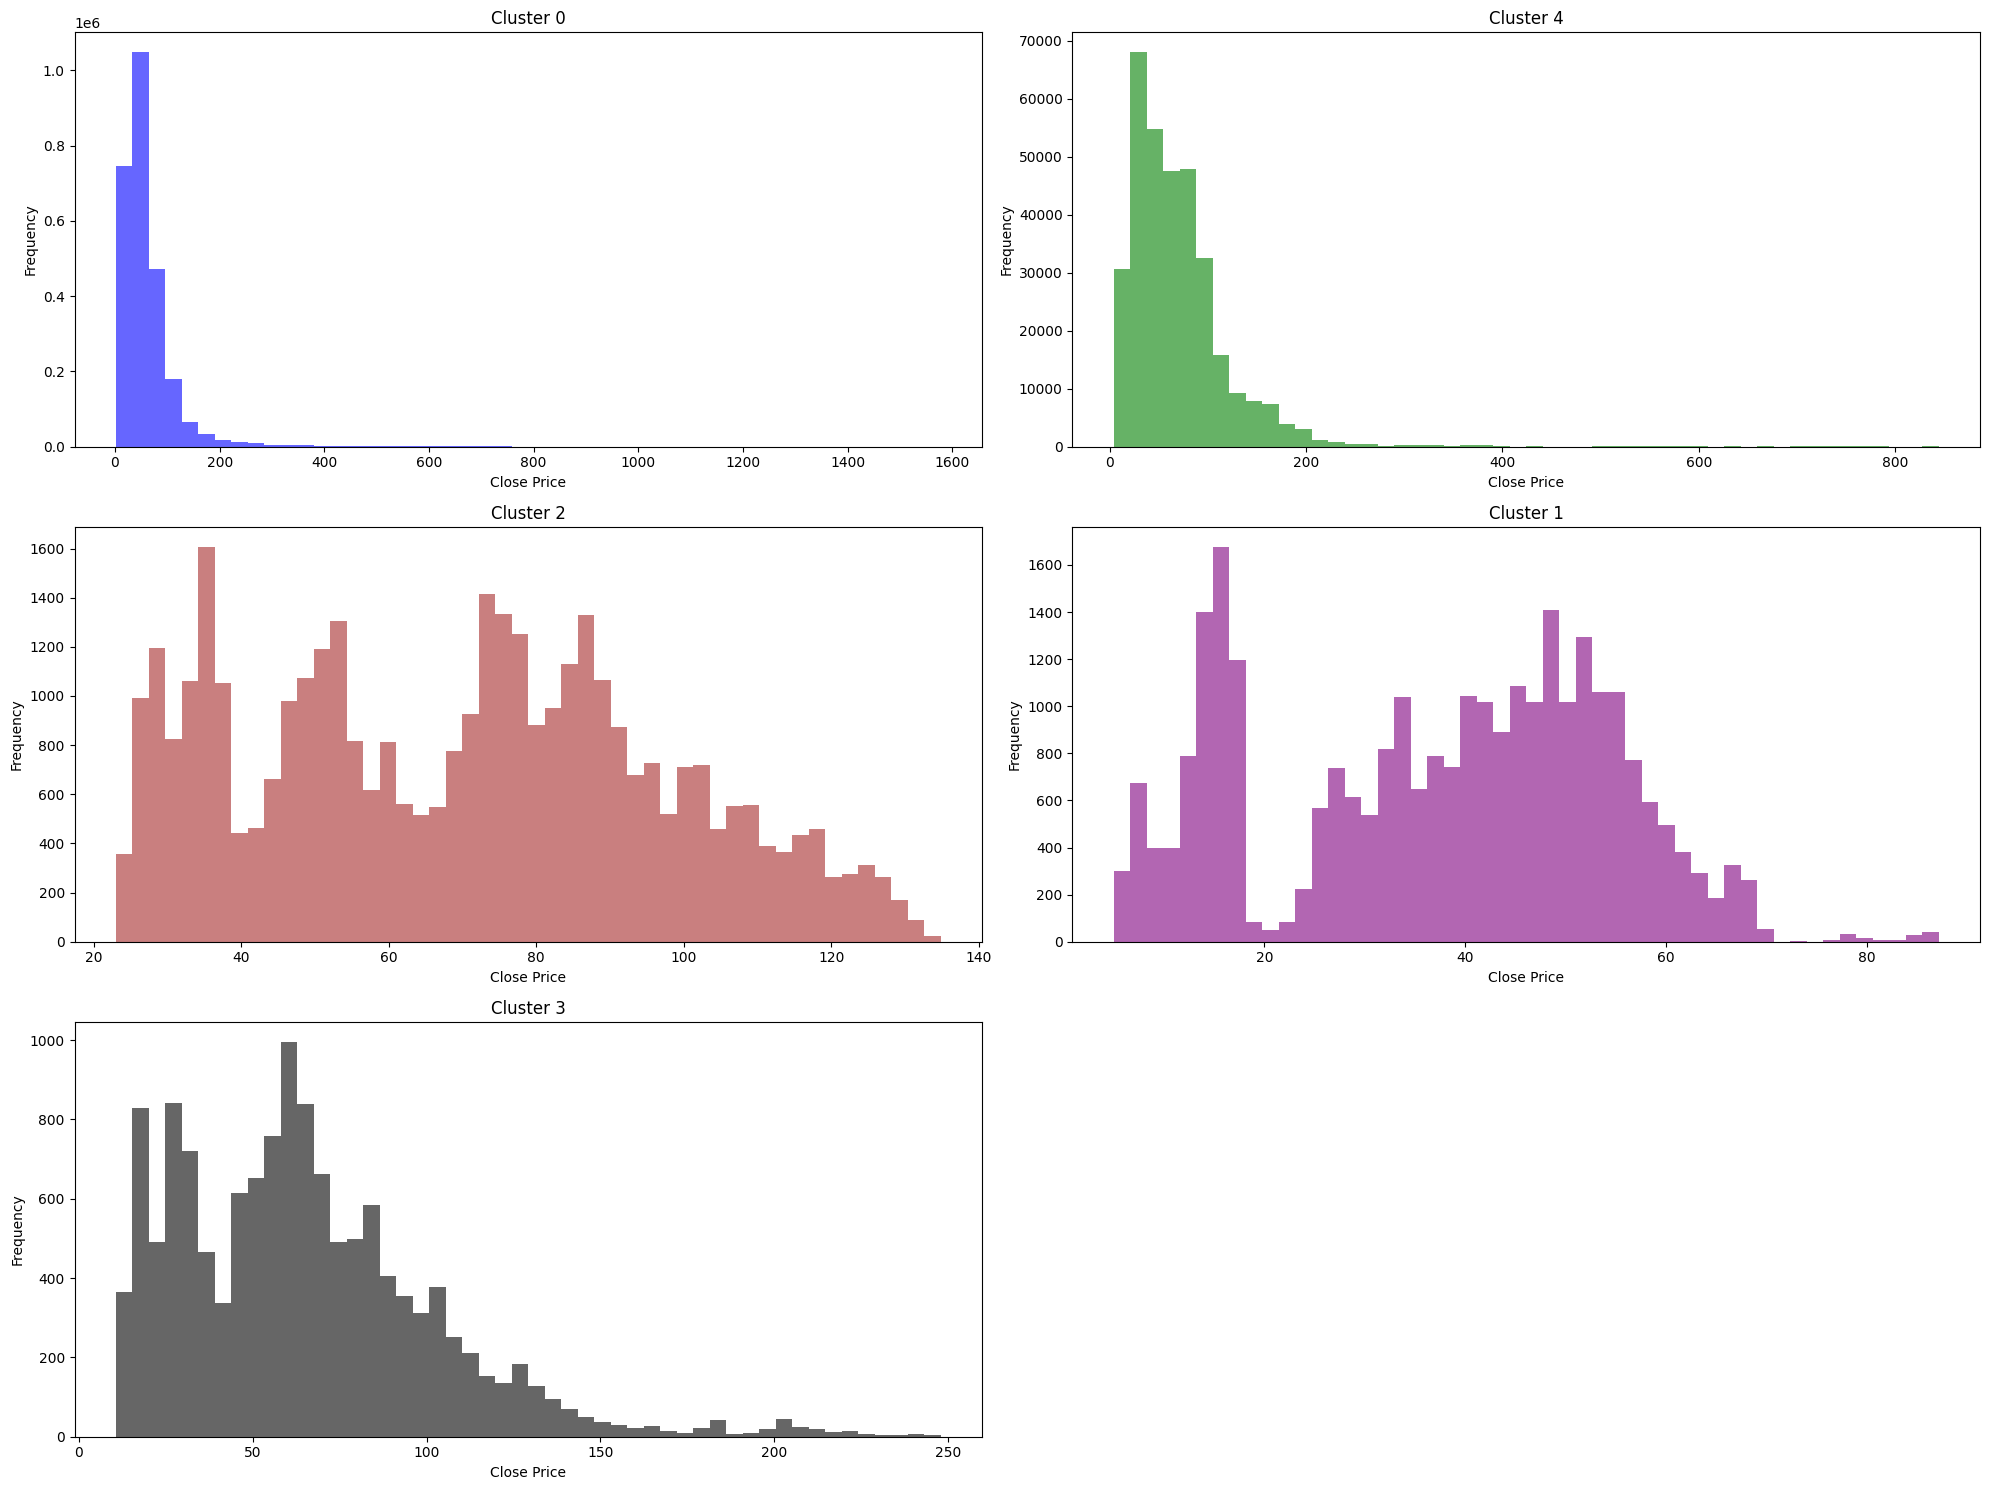

In [114]:
# Plotting the distribution of the 'close' prices for each cluster

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes = axes.ravel()

for idx, cluster in enumerate(prices_clusters_df['Cluster'].unique()):
    ax = axes[idx]
    cluster_data = prices_clusters_df[prices_clusters_df['Cluster'] == cluster]
    ax.hist(cluster_data['close'], bins=50, color=colors[idx % len(colors)], alpha=0.6)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Close Price')
    ax.set_ylabel('Frequency')

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()



What This Conveys:
The histograms show the distribution of closing prices within each cluster, revealing the diversity or homogeneity of the stocks in terms of their closing prices.
Clusters with skewed distributions (like Clusters 0 and 4) suggest that most stocks in those clusters have lower closing prices, with a few outliers.
Clusters with multimodal distributions (like Clusters 1, 2, and 3) indicate that these clusters contain stocks with varied closing prices, showing multiple sub-groups within the cluster.
This visualization helps in understanding the price characteristics of stocks within each cluster, which can be important for identifying patterns and making informed investment decisions based on cluster-specific behavior.

Silhouette Plot for Clustering Analysis
Purpose: A silhouette plot can be used to visualize how well each data point fits within its assigned cluster compared to other clusters. This plot gives an idea of the quality of the clustering process.
Contrast: It would highlight the effectiveness of the clustering process in grouping similar data points, which can be contrasted against how well the regression analysis predicts the relationship within those clusters.
Implementation: Use sklearn.metrics.silhouette_samples and silhouette_score to generate silhouette values for each sample and plot them

In [182]:
# # plotting silhouette plot to visualize how well each data point fits within its cluster

# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# # Selecting a subset of the data for clustering
# cluster_data = prices_clusters_df[['close', 'volume', 'previous_close', 'Cluster']]
# X = cluster_data.drop('Cluster', axis=1)

# # Standardizing the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # KMeans clustering
# kmeans = KMeans(n_clusters=5, random_state=0)
# kmeans.fit(X_scaled)
# cluster_labels = kmeans.predict(X_scaled)

# # Calculate the silhouette score
# silhouette_avg = silhouette_score(X_scaled, cluster_labels)
# print(f"Silhouette Score: {silhouette_avg}")

# # Plotting the silhouette plot
# from sklearn.metrics import silhouette_samples
# import matplotlib.cm as cm

# silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# fig, ax = plt.subplots(figsize=(10, 6))

# y_lower = 10

# for i in range(5):
#     cluster_silhouette_values = silhouette_values[cluster_labels == i]
#     cluster_silhouette_values.sort()

#     cluster_size = cluster_silhouette_values.shape[0]
#     y_upper = y_lower + cluster_size

#     color = cm.nipy_spectral(float(i) / 5)
#     ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

#     y_lower = y_upper + 10

# ax.set_title('Silhouette Plot')
# ax.set_xlabel('Silhouette Score')
# ax.set_ylabel('Cluster')
# ax.axvline(x=silhouette_avg, color="red", linestyle="--")
# ax.set_yticks([])
# plt.show()



## Resilience Analysis

In [198]:
# Resilience Indicators

resilience_cols = ['Ticker Symbol', 'Current Ratio', 'Quick Ratio', 'Net Income', 'Earnings Before Interest and Tax', 'Operating Income', 'Profit Margin', 'Net Cash Flow']
resilience_df = fundamentals_df[resilience_cols]
aapl_nvda_resilience_df = resilience_df[(resilience_df['Ticker Symbol'] == 'AAPL') | (resilience_df['Ticker Symbol'] == 'NVDA')]

kmeans = KMeans(n_clusters=5, random_state=0)
aapl_nvda_resilience_df['Cluster'] = kmeans.fit_predict(aapl_nvda_resilience_df.drop('Ticker Symbol', axis=1))

aapl_cluster = aapl_nvda_resilience_df[aapl_nvda_resilience_df['Ticker Symbol'] == 'AAPL']['Cluster'].values[0]
nvda_cluster = aapl_nvda_resilience_df[aapl_nvda_resilience_df['Ticker Symbol'] == 'NVDA']['Cluster'].values[0]

aapl_cluster_char = aapl_nvda_resilience_df[aapl_nvda_resilience_df['Cluster'] == aapl_cluster].drop('Ticker Symbol', axis=1).mean()
nvda_cluster_char = aapl_nvda_resilience_df[aapl_nvda_resilience_df['Cluster'] == nvda_cluster].drop('Ticker Symbol', axis=1).mean()

print('AAPL Cluster Characteristics')
print(aapl_cluster_char)

print('\nNVDA Cluster Characteristics')
print(nvda_cluster_char)


AAPL Cluster Characteristics
Current Ratio                       1.680000e+02
Quick Ratio                         1.640000e+02
Net Income                          3.703700e+10
Earnings Before Interest and Tax    5.015500e+10
Operating Income                    4.899900e+10
Profit Margin                       2.200000e+01
Net Cash Flow                       3.513000e+09
Cluster                             4.000000e+00
dtype: float64

NVDA Cluster Characteristics
Current Ratio                       4.947500e+02
Quick Ratio                         4.562500e+02
Net Income                          5.618840e+08
Earnings Before Interest and Tax    6.940832e+08
Operating Income                    6.625598e+08
Profit Margin                       1.225000e+01
Net Cash Flow                      -1.802250e+07
Cluster                             0.000000e+00
dtype: float64


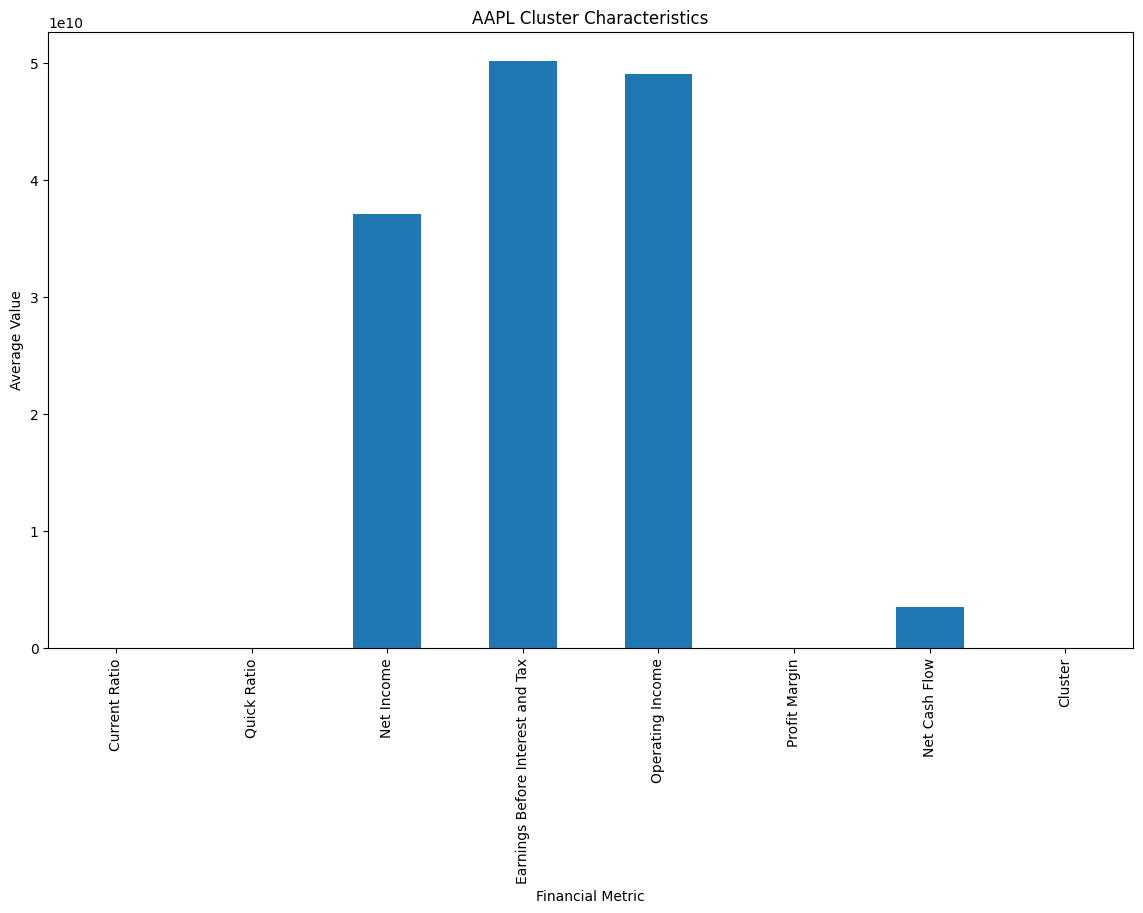

In [199]:

aapl_cluster_char.plot(kind='bar', figsize=(14,8))
plt.xlabel('Financial Metric')
plt.ylabel('Average Value')
plt.title('AAPL Cluster Characteristics')
plt.show()

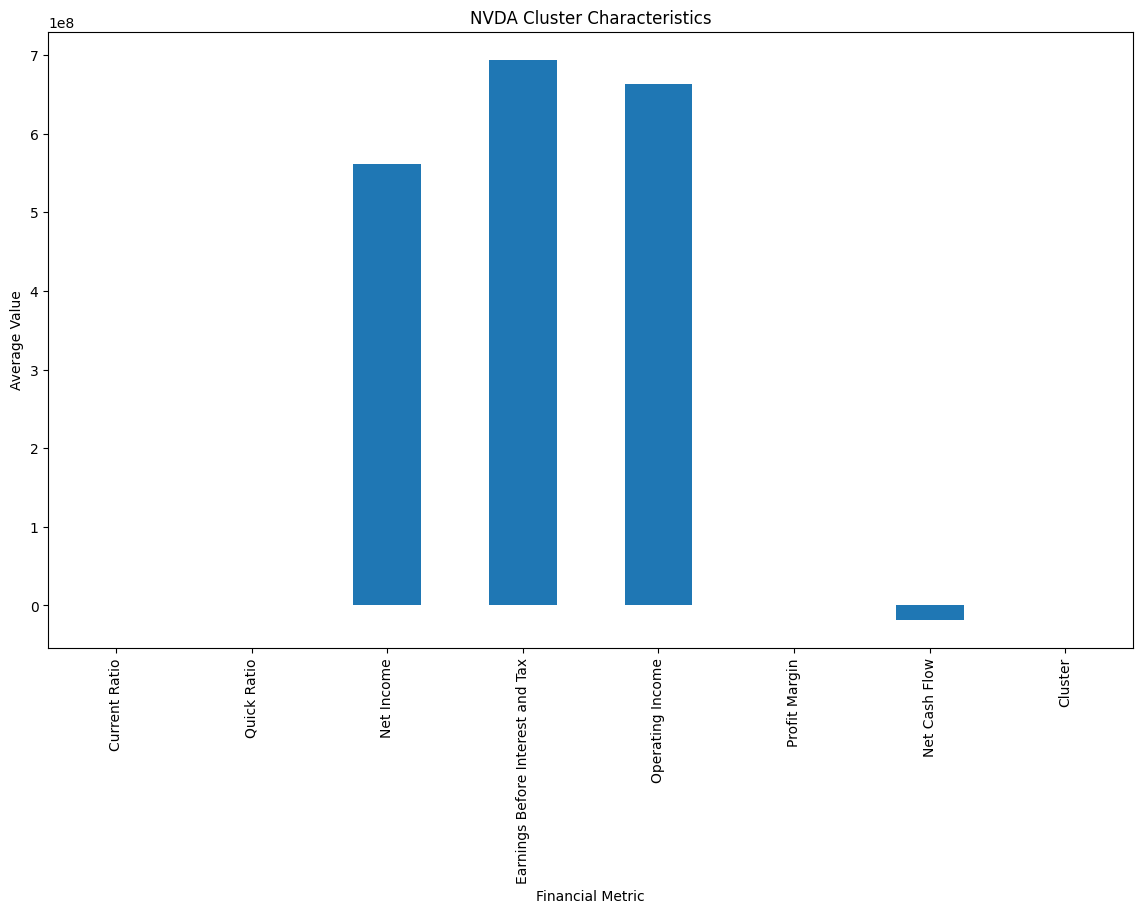

In [200]:
nvda_cluster_char.plot(kind='bar', figsize=(14,8))
plt.xlabel('Financial Metric')
plt.ylabel('Average Value')
plt.title('NVDA Cluster Characteristics')
plt.show()

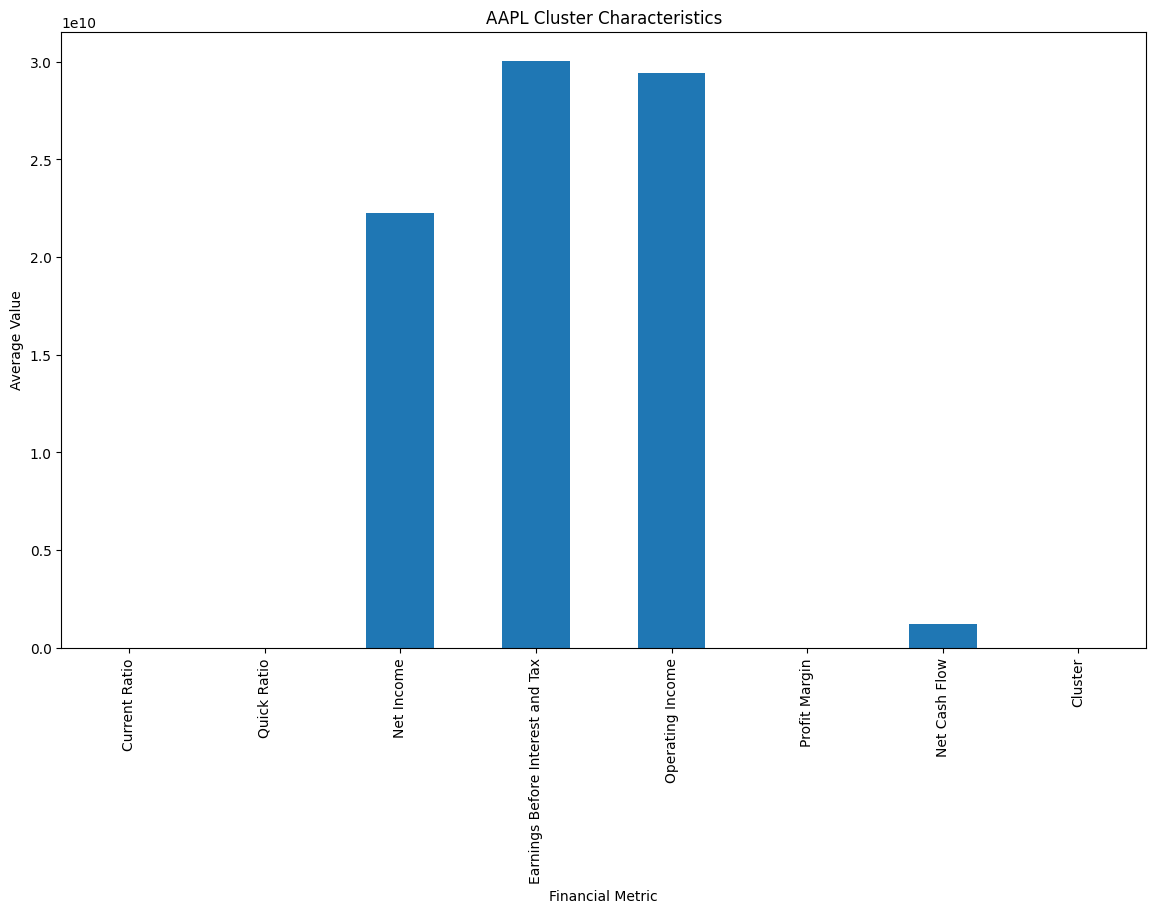

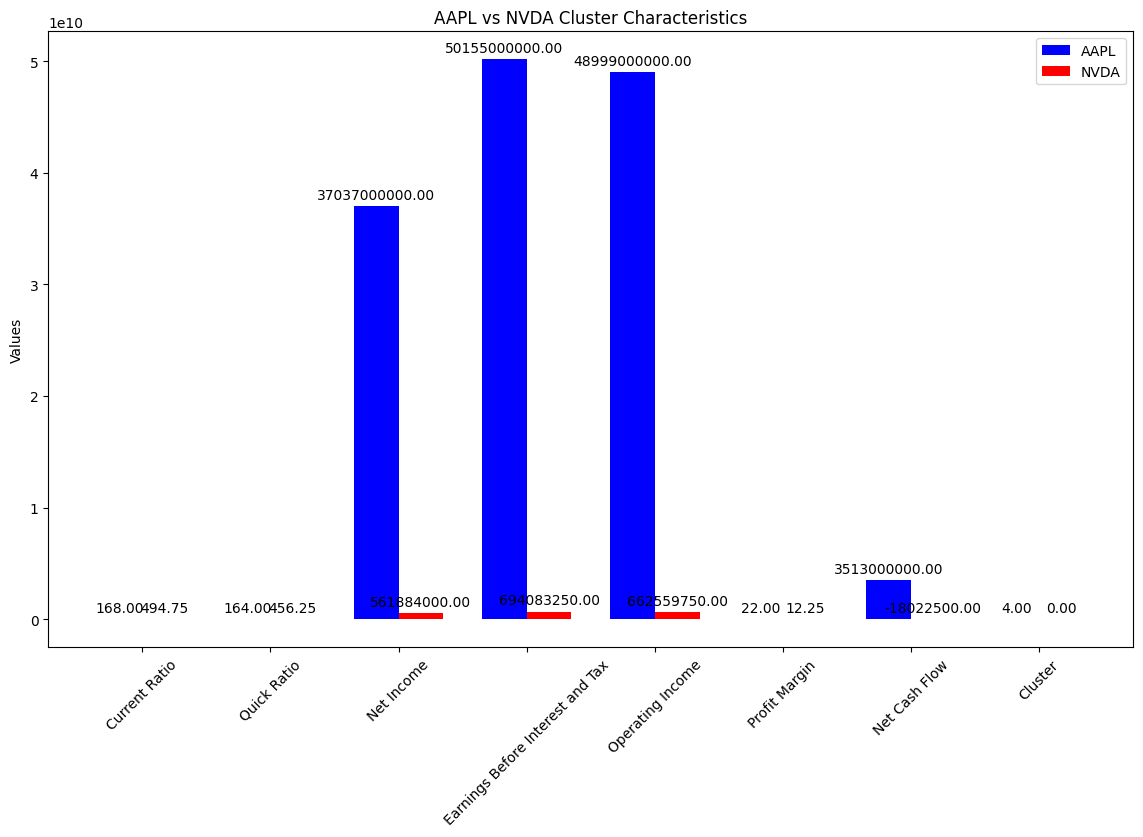

In [203]:
aapl_cluster_df = aapl_cluster_char.to_frame().reset_index()
aapl_cluster_df.columns = ['Indicator', 'AAPL']

nvda_cluster_df = nvda_cluster_char.to_frame().reset_index()
nvda_cluster_df.columns = ['Indicator', 'NVDA']

merged_clusters_df = aapl_cluster_df.merge(nvda_cluster_df, on='Indicator')

fig, ax = plt.subplots(figsize=(14, 8))
ind = range(len(merged_clusters_df))

width = 0.35
aapl_bars = ax.bar(ind, merged_clusters_df['AAPL'], width, color='blue')
nvda_bars = ax.bar([i + width for i in ind], merged_clusters_df['NVDA'], width, color='red')

ax.set_ylabel('Financial Indicators')
ax.set_ylabel('Values')
ax.set_title('AAPL vs NVDA Cluster Characteristics')
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(merged_clusters_df['Indicator'])
ax.legend(['AAPL', 'NVDA'])

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_value_labels(aapl_bars)
add_value_labels(nvda_bars)

plt.xticks(rotation=45)
plt.show()

### Resilience Analysis of Apple and Microsoft

In [100]:
# Resilience Indicators

resilience_cols = ['Ticker Symbol', 'Current Ratio', 'Quick Ratio', 'Net Income', 'Earnings Before Interest and Tax', 'Operating Income', 'Profit Margin', 'Net Cash Flow']
resilience_df = fundamentals_df[resilience_cols]
aapl_msft_resilience_df = resilience_df[(resilience_df['Ticker Symbol'] == 'AAPL') | (resilience_df['Ticker Symbol'] == 'MSFT')]

kmeans = KMeans(n_clusters=5, random_state=0)
aapl_msft_resilience_df['Cluster'] = kmeans.fit_predict(aapl_msft_resilience_df.drop('Ticker Symbol', axis=1))

aapl_cluster = aapl_msft_resilience_df[aapl_msft_resilience_df['Ticker Symbol'] == 'AAPL']['Cluster'].values[0]
msft_cluster = aapl_msft_resilience_df[aapl_msft_resilience_df['Ticker Symbol'] == 'MSFT']['Cluster'].values[0]

aapl_cluster_char = aapl_msft_resilience_df[aapl_msft_resilience_df['Cluster'] == aapl_cluster].drop('Ticker Symbol', axis=1).mean()
msft_cluster_char = aapl_msft_resilience_df[aapl_msft_resilience_df['Cluster'] == msft_cluster].drop('Ticker Symbol', axis=1).mean()

print('AAPL Cluster Characteristics')
print(aapl_cluster_char)

print('\MSFT Cluster Characteristics')
print(msft_cluster_char)


AAPL Cluster Characteristics
Current Ratio                       1.380000e+02
Quick Ratio                         1.345000e+02
Net Income                          3.827350e+10
Earnings Before Interest and Tax    5.181900e+10
Operating Income                    5.075100e+10
Profit Margin                       2.200000e+01
Net Cash Flow                       1.549000e+09
Cluster                             3.000000e+00
dtype: float64
\MSFT Cluster Characteristics
Current Ratio                       2.605000e+02
Quick Ratio                         2.555000e+02
Net Income                          2.196850e+10
Earnings Before Interest and Tax    2.743600e+10
Operating Income                    2.726150e+10
Profit Margin                       2.650000e+01
Net Cash Flow                       8.655000e+08
Cluster                             0.000000e+00
dtype: float64


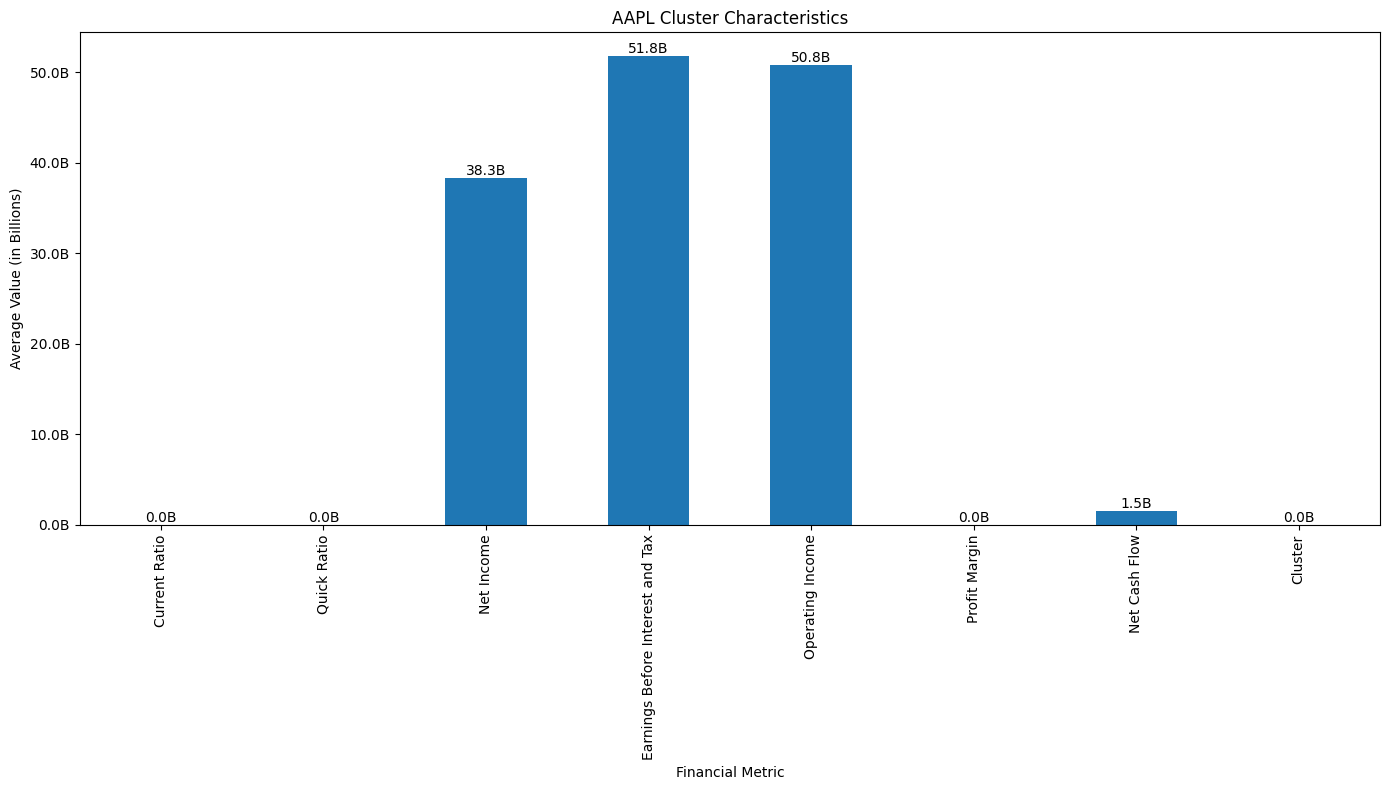

In [126]:
aapl_cluster_char.plot(kind='bar', figsize=(14,8))
plt.xlabel('Financial Metric')
plt.ylabel('Average Value (in Billions)')
plt.title('AAPL Cluster Characteristics')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))

for index, value in enumerate(aapl_cluster_char):
    plt.text(index, value, f'{value * 1e-9:.1f}B', ha='center', va='bottom')

plt.show()

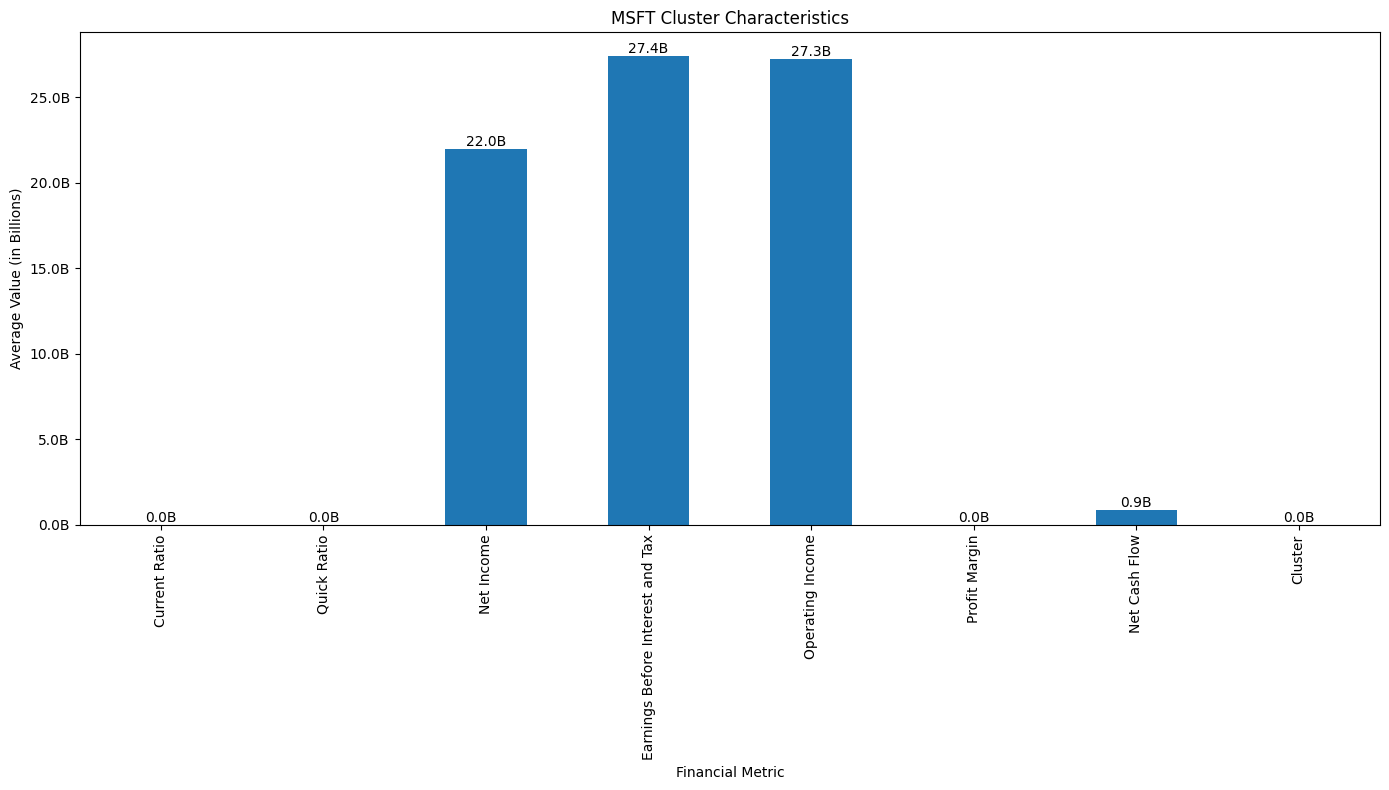

In [127]:

msft_cluster_char.plot(kind='bar', figsize=(14,8))
plt.xlabel('Financial Metric')
plt.ylabel('Average Value (in Billions)')
plt.title('MSFT Cluster Characteristics')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))

for index, value in enumerate(msft_cluster_char):
    plt.text(index, value, f'{value * 1e-9:.1f}B', ha='center', va='bottom')

plt.show()


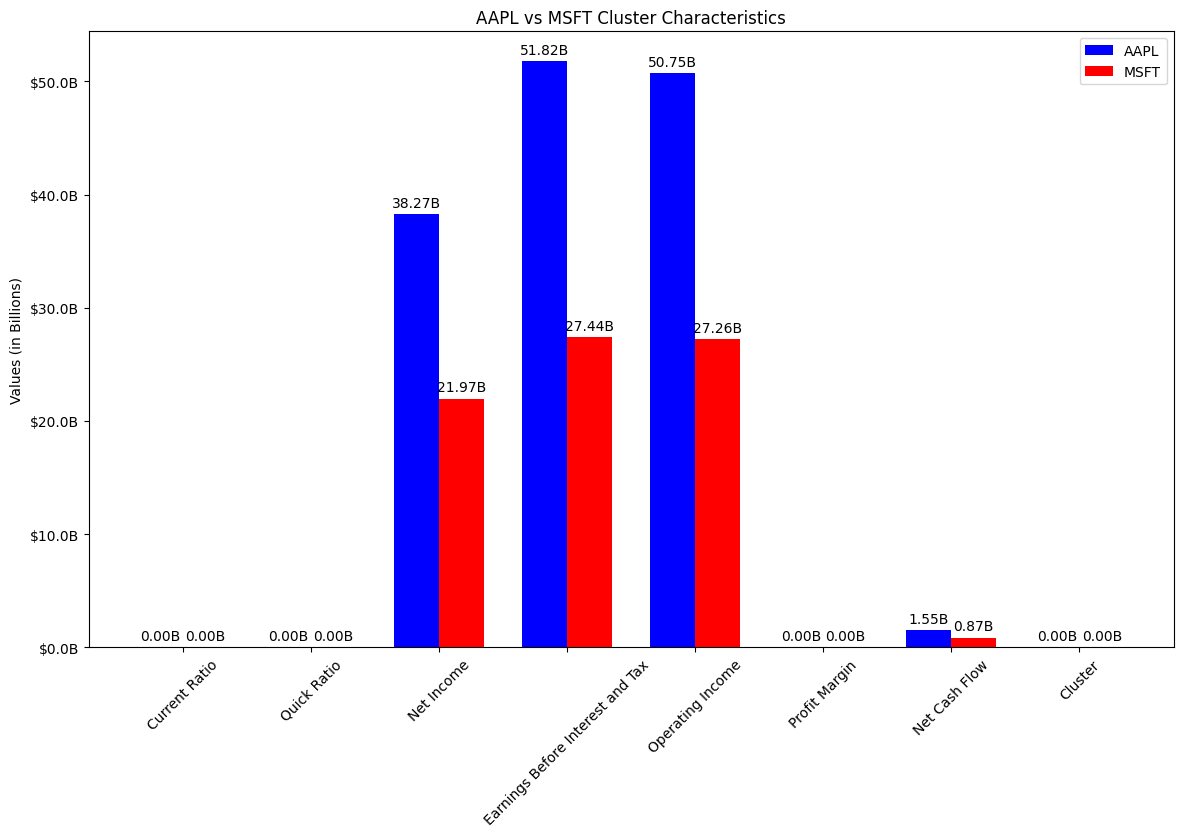

In [104]:
import matplotlib.pyplot as plt

# Assuming 'merged_clusters_df' contains your data
# and 'ind' is the index for x-ticks

# Convert the values to billions for the y-axis
def format_billions(value, pos):
    return f'${value * 1e-9:.1f}B'

aapl_cluster_df = aapl_cluster_char.to_frame().reset_index()
aapl_cluster_df.columns = ['Indicator', 'AAPL']

msft_cluster_df = msft_cluster_char.to_frame().reset_index()
msft_cluster_df.columns = ['Indicator', 'MSFT']

merged_clusters_df = aapl_cluster_df.merge(msft_cluster_df, on='Indicator')

fig, ax = plt.subplots(figsize=(14, 8))
ind = range(len(merged_clusters_df))

width = 0.35
aapl_bars = ax.bar(ind, merged_clusters_df['AAPL'], width, color='blue')
msft_bars = ax.bar([i + width for i in ind], merged_clusters_df['MSFT'], width, color='red')

# Formatting the y-axis to show values in billions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(format_billions))

# Set labels and title
ax.set_ylabel('Values (in Billions)')
ax.set_title('AAPL vs MSFT Cluster Characteristics')
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(merged_clusters_df['Indicator'])
ax.legend(['AAPL', 'MSFT'])

# Adding value labels above bars in billions
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height * 1e-9:.2f}B', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom')

add_value_labels(aapl_bars)
add_value_labels(msft_bars)

plt.xticks(rotation=45)
plt.show()
